# **Data Gathering**

* RowNumber : corresponds to the record (row) number and has no effect on the output
* CustomerId :contains random values and has no effect on customer leaving the bank
* Surname :the surname of a customer has no impact on their decision to leave the bank
* CreditScore : can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank
* Geography : a customer’s location can affect their decision to leave the bank.
* Gender : it’s interesting to explore whether gender plays a role in a customer leaving the bank
* Age : this is certainly relevant, since older customers are less likely to leave their bank than younger ones
* Tenure : refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank
* Balance : also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances
* NumOfProducts : refers to the number of products that a customer has purchased through the bank
* HasCrCard : denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank
* IsActiveMember : active customers are less likely to leave the bank
* EstimatedSalary : as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries
* Exited : whether or not the customer left the bank.

In [2]:
pip install xlrd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


______

# **Preparation**

Librarys import :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from statistics import mode

Bank Customer Churn Dataset loading to Google Colaboratory :

In [4]:
df_prep = pd.read_excel('/kaggle/input/customer-churn-rate-dataset/Customer Churn Rate Dataset.xlsx')
df_prep

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


________

## Raw Dataset Identification - For Analysis

In [5]:
row,column = df_prep.shape

print("Number of rows in the dataset      :", row)
print("Number of columns in the dataset   :", column)

Number of rows in the dataset      : 10000
Number of columns in the dataset   : 14


In [6]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Attributes with categorical data types :

In [7]:
df_ident_cat = (df_prep. dtypes == 'object')
object_columns = list(df_ident_cat[df_ident_cat].index)

print("Attributes with categorical data types :", object_columns)

Attributes with categorical data types : ['Surname', 'Geography', 'Gender']


Attributes with numerical data types :

In [8]:
df_ident_num = (df_prep. dtypes == 'int64')
int_columns = list(df_ident_num[df_ident_num].index)

print("Attributes with numerical data types :", int_columns)

Attributes with numerical data types : ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


> **Inference** :
> - There is no wrong data type for the attributes in the dataset

Looking for categorical attributes in dataset :

In [9]:
df_cat = df_prep[['CustomerId','Surname', 'Geography', 'Gender']]
df_cat.head()

,CustomerId,Surname,Geography,Gender
0,15634602,Hargrave,France,Female
1,15647311,Hill,Spain,Female
2,15619304,Onio,France,Female
3,15701354,Boni,France,Female
4,15737888,Mitchell,Spain,Female


In [10]:
df_cat.nunique()

CustomerId    10000
Surname        2932
Geography         3
Gender            2
dtype: int64

Looking for numerical attributes in dataset :

In [11]:
df_num = df_prep[['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
df_num.head()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df_num.nunique()

RowNumber          10000
CustomerId         10000
CreditScore          460
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [13]:
df_prep2 = df_prep.copy()

In [14]:
df_prep2

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


_______

## Raw Dataset Transformation - For Analysis

Transforming the attributes in the data set and adding new attributes relevant to the analysis :

In [15]:
df_num_ = df_num.copy()

In [16]:
df_num_ = df_prep2[['CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']]
df_num_

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1


### CreditScore Attribute

Create a New Variable named **CreditClassification**, load the value :
* **Poor**      : <= 579
* **Fair**      : 580 to 669
* **Good**      : 670 to 739
* **Very Good** : 740 to 799
* **Excellent** : >= 800

In [17]:
Credit_Score_Conditions = [
    (df_num_['CreditScore'] <= 579),
    (df_num_['CreditScore'] >= 580) & (df_num_['CreditScore'] <= 669),
    (df_num_['CreditScore'] >= 670) & (df_num_['CreditScore'] <= 739),
    (df_num_['CreditScore'] >= 740) & (df_num_['CreditScore'] <= 799),
    (df_num_['CreditScore'] >= 800)
]
Credit_Score_Categories = ['Poor', 'Fair', 'Good','Very Good','Excellent']
df_num_['CreditClassification'] = np.select(Credit_Score_Conditions, Credit_Score_Categories)
df_num_

/tmp/ipykernel_32/1422391201.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_['CreditClassification'] = np.select(Credit_Score_Conditions, Credit_Score_Categories)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Fair
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Fair
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Poor
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Good
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Very Good
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Poor
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Good
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Very Good


In [18]:
df_num_['CreditClassification'].value_counts().reset_index()

,CreditClassification,count
0,Fair,3331
1,Good,2428
2,Poor,2362
3,Very Good,1224
4,Excellent,655


### Age Attribute

Create a New Variable named **AgeClassification**, load the value :
* **Teen**             : < 20
* **Adult**            : 20 to 39
* **Middle Age Adult** : 40 to 59
* **Senior Adult**     : >= 60

In [19]:
Age_Conditions = [
    (df_num_['Age'] < 20),
    (df_num_['Age'] >= 20) & (df_num_['Age'] <= 39),
    (df_num_['Age'] >= 40) & (df_num_['Age'] <= 59),
    (df_num_['Age'] >= 60)
]
Age_Categories = ['Teen', 'Adult', 'Middle Age Adult','Senior Adult']
df_num_['AgeClassification'] = np.select(Age_Conditions, Age_Categories)
df_num_

/tmp/ipykernel_32/1789240969.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_['AgeClassification'] = np.select(Age_Conditions, Age_Categories)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult


In [20]:
df_num_['AgeClassification'].value_counts().reset_index()

,AgeClassification,count
0,Adult,5938
1,Middle Age Adult,3487
2,Senior Adult,526
3,Teen,49


### Tenure Attribute

Create a New Variable named **TenureClassification**, load the value :

* **0 to 2 Years**
* **3 to 4 Years**
* **5 to 6 Years**
* **7 to 8 Years**
* **Above 8 Years**

In [21]:
Tenure_Conditions = [
    (df_num_['Tenure'] <= 2),
    (df_num_['Tenure'] >= 3) & (df_num_['Tenure'] <= 4),
    (df_num_['Tenure'] >= 5) & (df_num_['Tenure'] <= 6),
    (df_num_['Tenure'] >= 7) & (df_num_['Tenure'] <= 8),
    (df_num_['Tenure'] > 8)
]
Tenure_Categories = ['0 to 2 Years', '3 to 4 Years', '5 to 6 Years','7 to 8 Years', 'Above 8 Years']
df_num_['TenureClassification'] = np.select(Tenure_Conditions, Tenure_Categories)
df_num_

/tmp/ipykernel_32/514456347.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num_['TenureClassification'] = np.select(Tenure_Conditions, Tenure_Categories)


,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years


In [22]:
df_num_['TenureClassification'].value_counts().reset_index()

,TenureClassification,count
0,0 to 2 Years,2496
1,7 to 8 Years,2053
2,3 to 4 Years,1998
3,5 to 6 Years,1979
4,Above 8 Years,1474


### Balance Attribute

Create a New Variable named **BalanceClassification**, load the value :

* **Less than 50.000**
* **50.000 to 100.000**
* **100.000 to 150.000**
* **150.000 to 200.000**
* **Above 200.000**

In [23]:
Balance_Conditions = [
    (df_num_['Balance'] < 50000),
    (df_num_['Balance'] >= 50000) & (df_num_['Balance'] <= 100000),
    (df_num_['Balance'] >= 100000) & (df_num_['Balance'] <= 150000),
    (df_num_['Balance'] >= 150000) & (df_num_['Balance'] <= 200000),
    (df_num_['Balance'] > 200000)
]
Balance_Categories = ['Less than 50.000', '50.000 to 100.000', '100.000 to 150.000', '150.000 to 200.000', 'Above 200.000']
df_num_['BalanceClassification'] = np.select(Balance_Conditions, Balance_Categories)
df_num_

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years,50.000 to 100.000
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years,Less than 50.000
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years,Less than 50.000
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years,50.000 to 100.000
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years,50.000 to 100.000


In [24]:
df_num_['BalanceClassification'].value_counts().reset_index()

,BalanceClassification,count
0,100.000 to 150.000,3830
1,Less than 50.000,3692
2,50.000 to 100.000,1509
3,150.000 to 200.000,935
4,Above 200.000,34


In [25]:
df_identification = df_num_.loc[df_num_['BalanceClassification'] == 'Above 200.000']
df_identification.sort_values(by = 'EstimatedSalary', ascending = True).head()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification
9920,15673020,678,49,3,204510.94,1,0,1,738.88,1,Good,Middle Age Adult,3 to 4 Years,Above 200.000
8982,15627971,504,32,8,206663.75,1,0,0,16281.94,0,Poor,Adult,7 to 8 Years,Above 200.000
6271,15620756,747,49,6,202904.64,1,1,1,17298.72,1,Very Good,Middle Age Adult,5 to 6 Years,Above 200.000
4533,15607275,850,39,6,206014.94,2,0,1,42774.84,1,Excellent,Adult,5 to 6 Years,Above 200.000
6913,15784180,564,36,7,206329.65,1,1,1,46632.87,1,Poor,Adult,7 to 8 Years,Above 200.000


### EstimatedSalary Attribute

Create a New Variable named **SalaryClassification**, load the value :

* **Less than 50.000**
* **50.000 to 100.000**
* **100.000 to 150.000**
* **150.000 to 200.000**

In [26]:
Salary_Conditions = [
    (df_num_['EstimatedSalary'] < 50000),
    (df_num_['EstimatedSalary'] >= 50000) & (df_num_['EstimatedSalary'] <= 100000),
    (df_num_['EstimatedSalary'] >= 100000) & (df_num_['EstimatedSalary'] <= 150000),
    (df_num_['EstimatedSalary'] >= 150000) & (df_num_['EstimatedSalary'] <= 200000)
]
Salary_Categories = ['Less than 50.000', '50.000 to 100.000', '100.000 to 150.000', '150.000 to 200.000']
df_num_['SalaryClassification'] = np.select(Salary_Conditions, Salary_Categories)
df_num_

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000,100.000 to 150.000
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years,50.000 to 100.000,100.000 to 150.000
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000,100.000 to 150.000
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years,Less than 50.000,50.000 to 100.000
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years,100.000 to 150.000,50.000 to 100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years,Less than 50.000,50.000 to 100.000
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years,50.000 to 100.000,100.000 to 150.000
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000,Less than 50.000
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years,50.000 to 100.000,50.000 to 100.000


In [27]:
df_num_['SalaryClassification'].value_counts()

SalaryClassification
100.000 to 150.000    2555
50.000 to 100.000     2537
150.000 to 200.000    2455
Less than 50.000      2453
Name: count, dtype: int64

In [28]:
df_num_['SalaryClassification'].value_counts().reset_index()

,SalaryClassification,count
0,100.000 to 150.000,2555
1,50.000 to 100.000,2537
2,150.000 to 200.000,2455
3,Less than 50.000,2453


### Gender Attribute

Encoding the gender attribute using LabelEncoding :
* **Male = 1**
* **Female = 0**

In [29]:
df_cat_ = df_cat.copy()

In [30]:
df_cat['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [31]:
s = ['Gender']
LE = LabelEncoder()
for i in s:
    df_cat_[i] = df_cat_[[i]]. apply(LE.fit_transform)

print("Gender attribute has numeric attribute")

Gender attribute has numeric attribute


In [32]:
df_cat_['Gender'].value_counts()

Gender
1    5457
0    4543
Name: count, dtype: int64

## Restore the whole Dataset : Merging numerical (df_num_) and categorical (df_cat) datasets


In [33]:
df_merge = df_cat_.merge(df_num_, how = 'inner', on = 'CustomerId')
df_merge

,CustomerId,Surname,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
0,15634602,Hargrave,France,0,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000,100.000 to 150.000
1,15647311,Hill,Spain,0,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years,50.000 to 100.000,100.000 to 150.000
2,15619304,Onio,France,0,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000,100.000 to 150.000
3,15701354,Boni,France,0,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years,Less than 50.000,50.000 to 100.000
4,15737888,Mitchell,Spain,0,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years,100.000 to 150.000,50.000 to 100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,France,1,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years,Less than 50.000,50.000 to 100.000
9996,15569892,Johnstone,France,1,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years,50.000 to 100.000,100.000 to 150.000
9997,15584532,Liu,France,0,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000,Less than 50.000
9998,15682355,Sabbatini,Germany,1,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years,50.000 to 100.000,50.000 to 100.000


_______

## Cleaning The Dataset

### Missing Data - For Analysis

In [34]:
df_missing = df_merge.copy()

In [35]:
df_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             10000 non-null  int64  
 1   Surname                10000 non-null  object 
 2   Geography              10000 non-null  object 
 3   Gender                 10000 non-null  int64  
 4   CreditScore            10000 non-null  int64  
 5   Age                    10000 non-null  int64  
 6   Tenure                 10000 non-null  int64  
 7   Balance                10000 non-null  float64
 8   NumOfProducts          10000 non-null  int64  
 9   HasCrCard              10000 non-null  int64  
 10  IsActiveMember         10000 non-null  int64  
 11  EstimatedSalary        10000 non-null  float64
 12  Exited                 10000 non-null  int64  
 13  CreditClassification   10000 non-null  object 
 14  AgeClassification      10000 non-null  object 
 15  Ten

Attributes with categorical and numerical data types :

In [36]:
df_ident_cat = (df_missing. dtypes == 'object')
object_columns = list(df_ident_cat[df_ident_cat].index)

print("Attributes with categorical data types :\n", object_columns)

print('\n')

df_ident_num = (df_missing. dtypes == 'int64')
int_columns = list(df_ident_num[df_ident_num].index)

print("Attributes with numerical data types :\n", int_columns)

Attributes with categorical data types :
 ['Surname', 'Geography', 'CreditClassification', 'AgeClassification', 'TenureClassification', 'BalanceClassification', 'SalaryClassification']


Attributes with numerical data types :
 ['CustomerId', 'Gender', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']


In [37]:
df_missing.isna().sum()

CustomerId               0
Surname                  0
Geography                0
Gender                   0
CreditScore              0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
HasCrCard                0
IsActiveMember           0
EstimatedSalary          0
Exited                   0
CreditClassification     0
AgeClassification        0
TenureClassification     0
BalanceClassification    0
SalaryClassification     0
dtype: int64

> **Inference** :
> - There's no dataset has **MISSING VALUES**

________________________

### Typos - For Analysis

In [38]:
df_typos = df_missing.copy()

In [39]:
df_typos.nunique()

CustomerId               10000
Surname                   2932
Geography                    3
Gender                       2
CreditScore                460
Age                         70
Tenure                      11
Balance                   6382
NumOfProducts                4
HasCrCard                    2
IsActiveMember               2
EstimatedSalary           9999
Exited                       2
CreditClassification         5
AgeClassification            4
TenureClassification         5
BalanceClassification        5
SalaryClassification         4
dtype: int64

> **Inference** :
> - There's no dataset has **TYPOS**

____________________

### Duplicate - For Analysis

In [40]:
df_duplicate = df_typos.copy()

In [41]:
df_duplicate.duplicated().sum()

0

In [42]:
df_duplicate['CustomerId'].duplicated()

df_duplicate_ident = df_duplicate['CustomerId'].duplicated(keep = False)
df_duplicate.loc[df_duplicate_ident]

,CustomerId,Surname,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification


In [43]:
print("Customer Id attribute has duplicate data (True or False) :", df_duplicate['CustomerId'].duplicated().any())

Customer Id attribute has duplicate data (True or False) : False


> **Inference** :
> - There's no dataset has **DUPLICATE**

___________________________________

### Dropping Irrelevant Feature

In [44]:
df_dropping = df_duplicate.copy()

In [45]:
df_dropping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             10000 non-null  int64  
 1   Surname                10000 non-null  object 
 2   Geography              10000 non-null  object 
 3   Gender                 10000 non-null  int64  
 4   CreditScore            10000 non-null  int64  
 5   Age                    10000 non-null  int64  
 6   Tenure                 10000 non-null  int64  
 7   Balance                10000 non-null  float64
 8   NumOfProducts          10000 non-null  int64  
 9   HasCrCard              10000 non-null  int64  
 10  IsActiveMember         10000 non-null  int64  
 11  EstimatedSalary        10000 non-null  float64
 12  Exited                 10000 non-null  int64  
 13  CreditClassification   10000 non-null  object 
 14  AgeClassification      10000 non-null  object 
 15  Ten

In [46]:
df_dropping.drop(['Surname'], inplace=True, axis=1)

________________________

# New Dataset : Total Bank Customer Dataset (Clean)

In [47]:
df_total = df_dropping.copy()

In [48]:
df_total

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
0,15634602,France,0,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000,100.000 to 150.000
1,15647311,Spain,0,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years,50.000 to 100.000,100.000 to 150.000
2,15619304,France,0,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000,100.000 to 150.000
3,15701354,France,0,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years,Less than 50.000,50.000 to 100.000
4,15737888,Spain,0,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years,100.000 to 150.000,50.000 to 100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,1,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years,Less than 50.000,50.000 to 100.000
9996,15569892,France,1,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years,50.000 to 100.000,100.000 to 150.000
9997,15584532,France,0,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000,Less than 50.000
9998,15682355,Germany,1,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years,50.000 to 100.000,50.000 to 100.000


## Identification Total Customer Per Attribute

<Axes: xlabel='SalaryClassification', ylabel='count'>

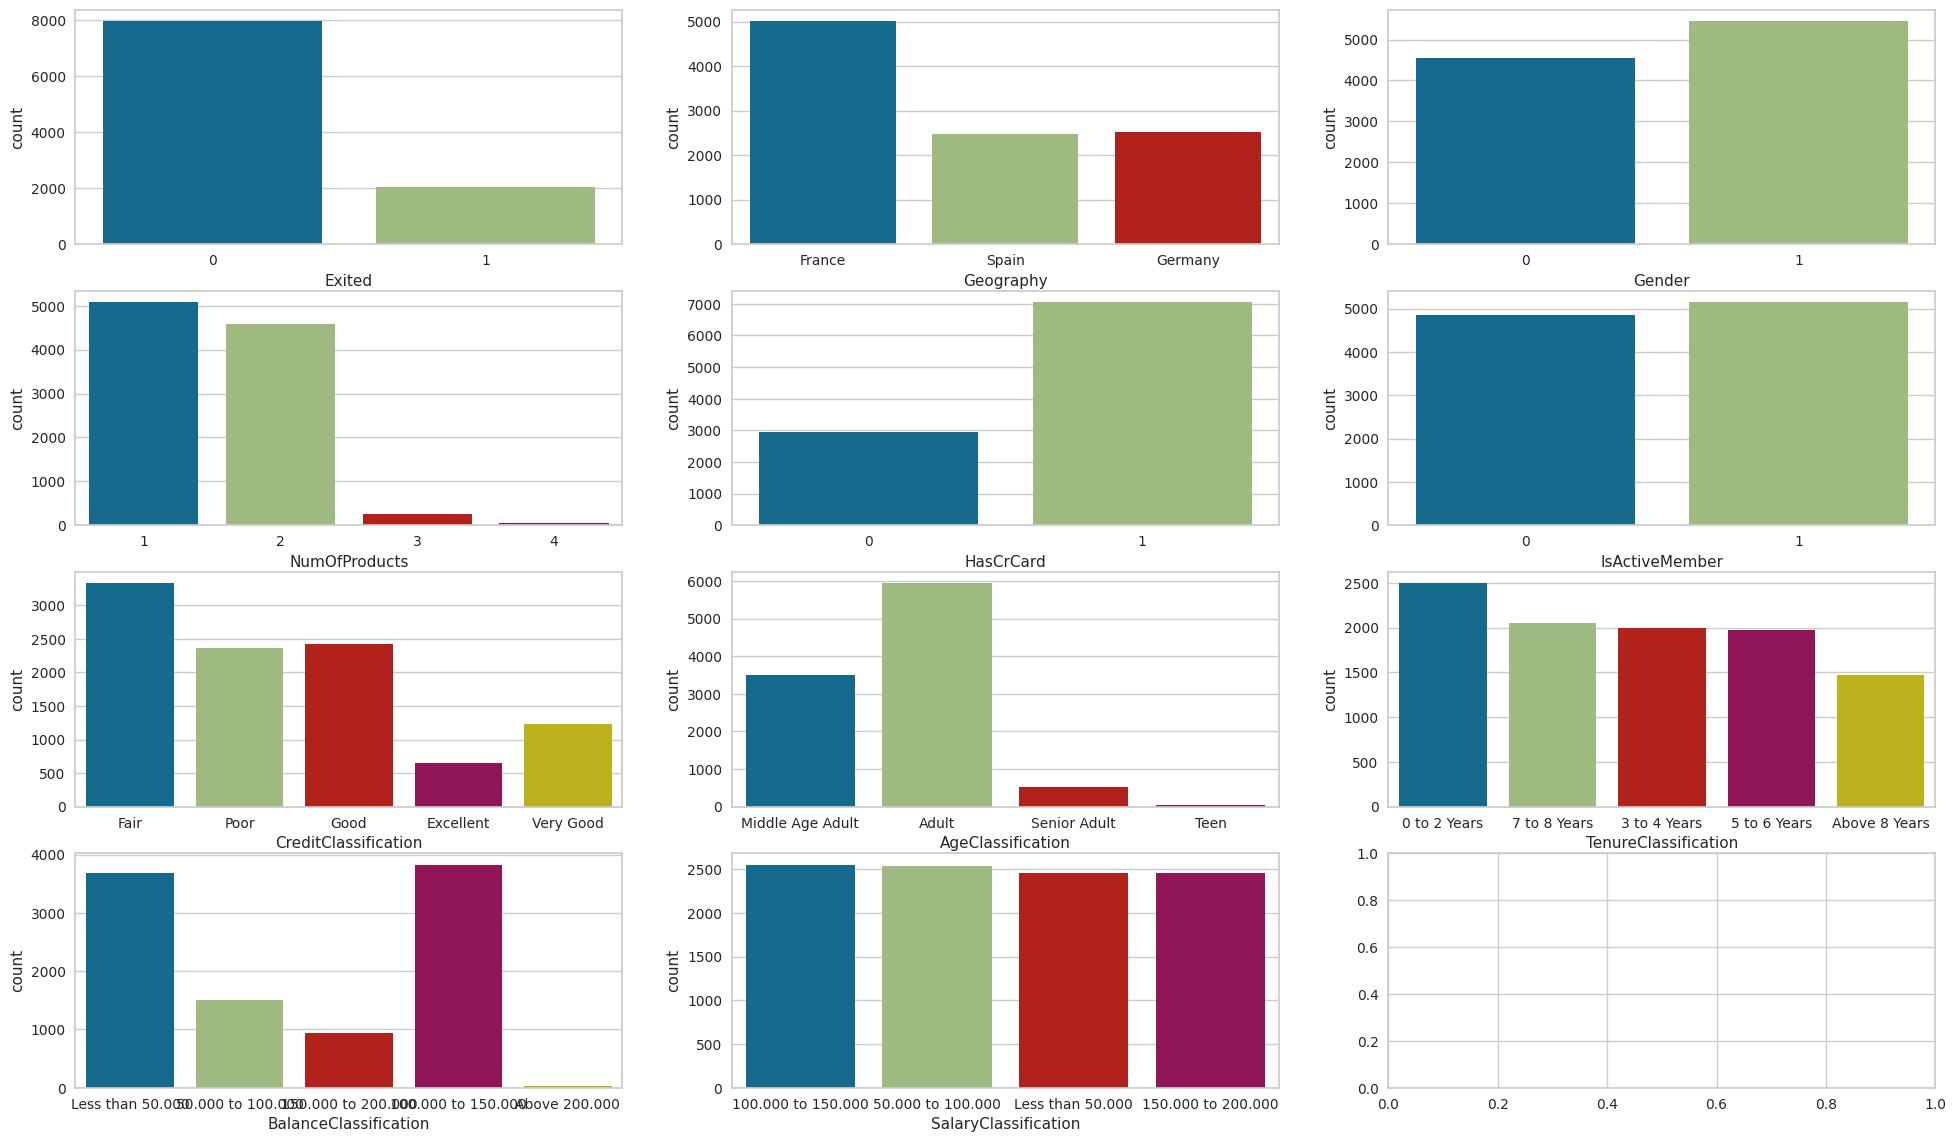

In [49]:
fig, axarr = plt.subplots(4, 3, figsize=(24, 14))
sns.countplot(x='Exited', data = df_total, ax=axarr[0][0])
sns.countplot(x='Geography', data = df_total, ax=axarr[0][1])
sns.countplot(x='Gender', data = df_total, ax=axarr[0][2])
sns.countplot(x='NumOfProducts', data = df_total, ax=axarr[1][0])
sns.countplot(x='HasCrCard', data = df_total, ax=axarr[1][1])
sns.countplot(x='IsActiveMember', data = df_total, ax=axarr[1][2])
sns.countplot(x='CreditClassification', data = df_total, ax=axarr[2][0])
sns.countplot(x='AgeClassification', data = df_total, ax=axarr[2][1])
sns.countplot(x='TenureClassification', data = df_total, ax=axarr[2][2])
sns.countplot(x='BalanceClassification', data = df_total, ax=axarr[3][0])
sns.countplot(x='SalaryClassification', data = df_total, ax=axarr[3][1])

In [50]:
df_total_agg = df_total.groupby(['Exited']).agg({'CustomerId':'count'}).reset_index()

df_total_agg['Percentage'] = df_total_agg['CustomerId']/df_total_agg['CustomerId'].sum()
df_total_agg

,Exited,CustomerId,Percentage
0,0,7963,0.7963
1,1,2037,0.2037


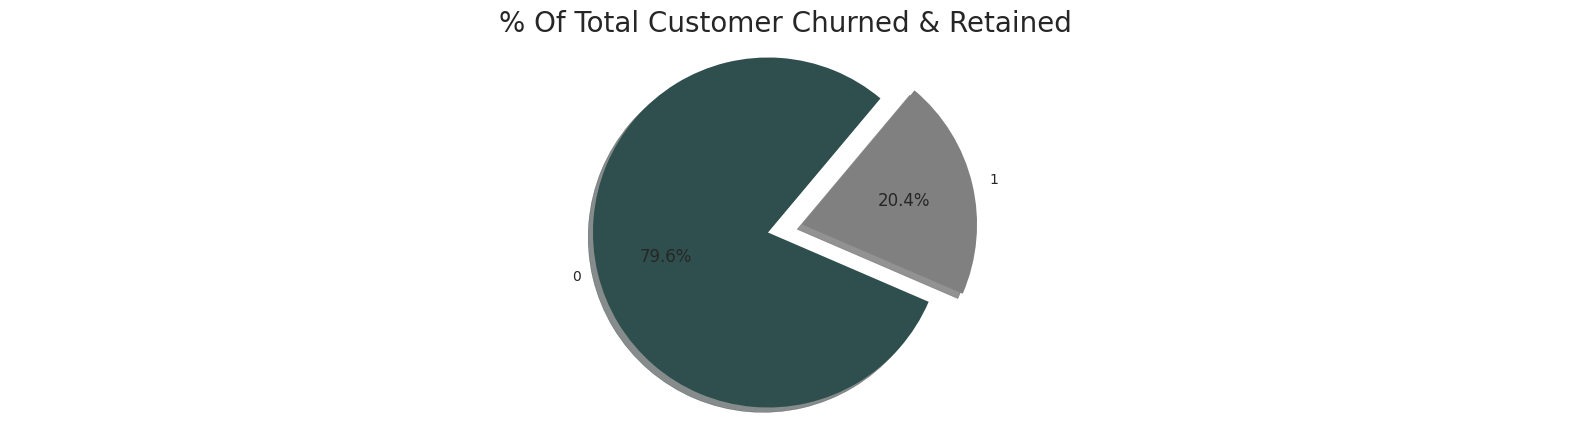

In [51]:
my_colors = ['darkslategray','Gray']
my_explode = (0.1, 0.1)


plt.figure(figsize=(20,5))
plt.pie(df_total_agg['Percentage'], labels = df_total_agg['Exited'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Customer Churned & Retained',fontsize = 20)
plt.axis('equal')
plt.show()

> **Inference** :
> - The number of customers who decided to stay was 7.963 customers (79.63% of Total Number Of Customers)
> - The number of customers who decided to **churn** was 2.037 customers (20.37% of Total Number Of Customers)

## Identification Total Customer Per Attribute (Partition by Churn & Retained Customer)

<Axes: xlabel='SalaryClassification', ylabel='count'>

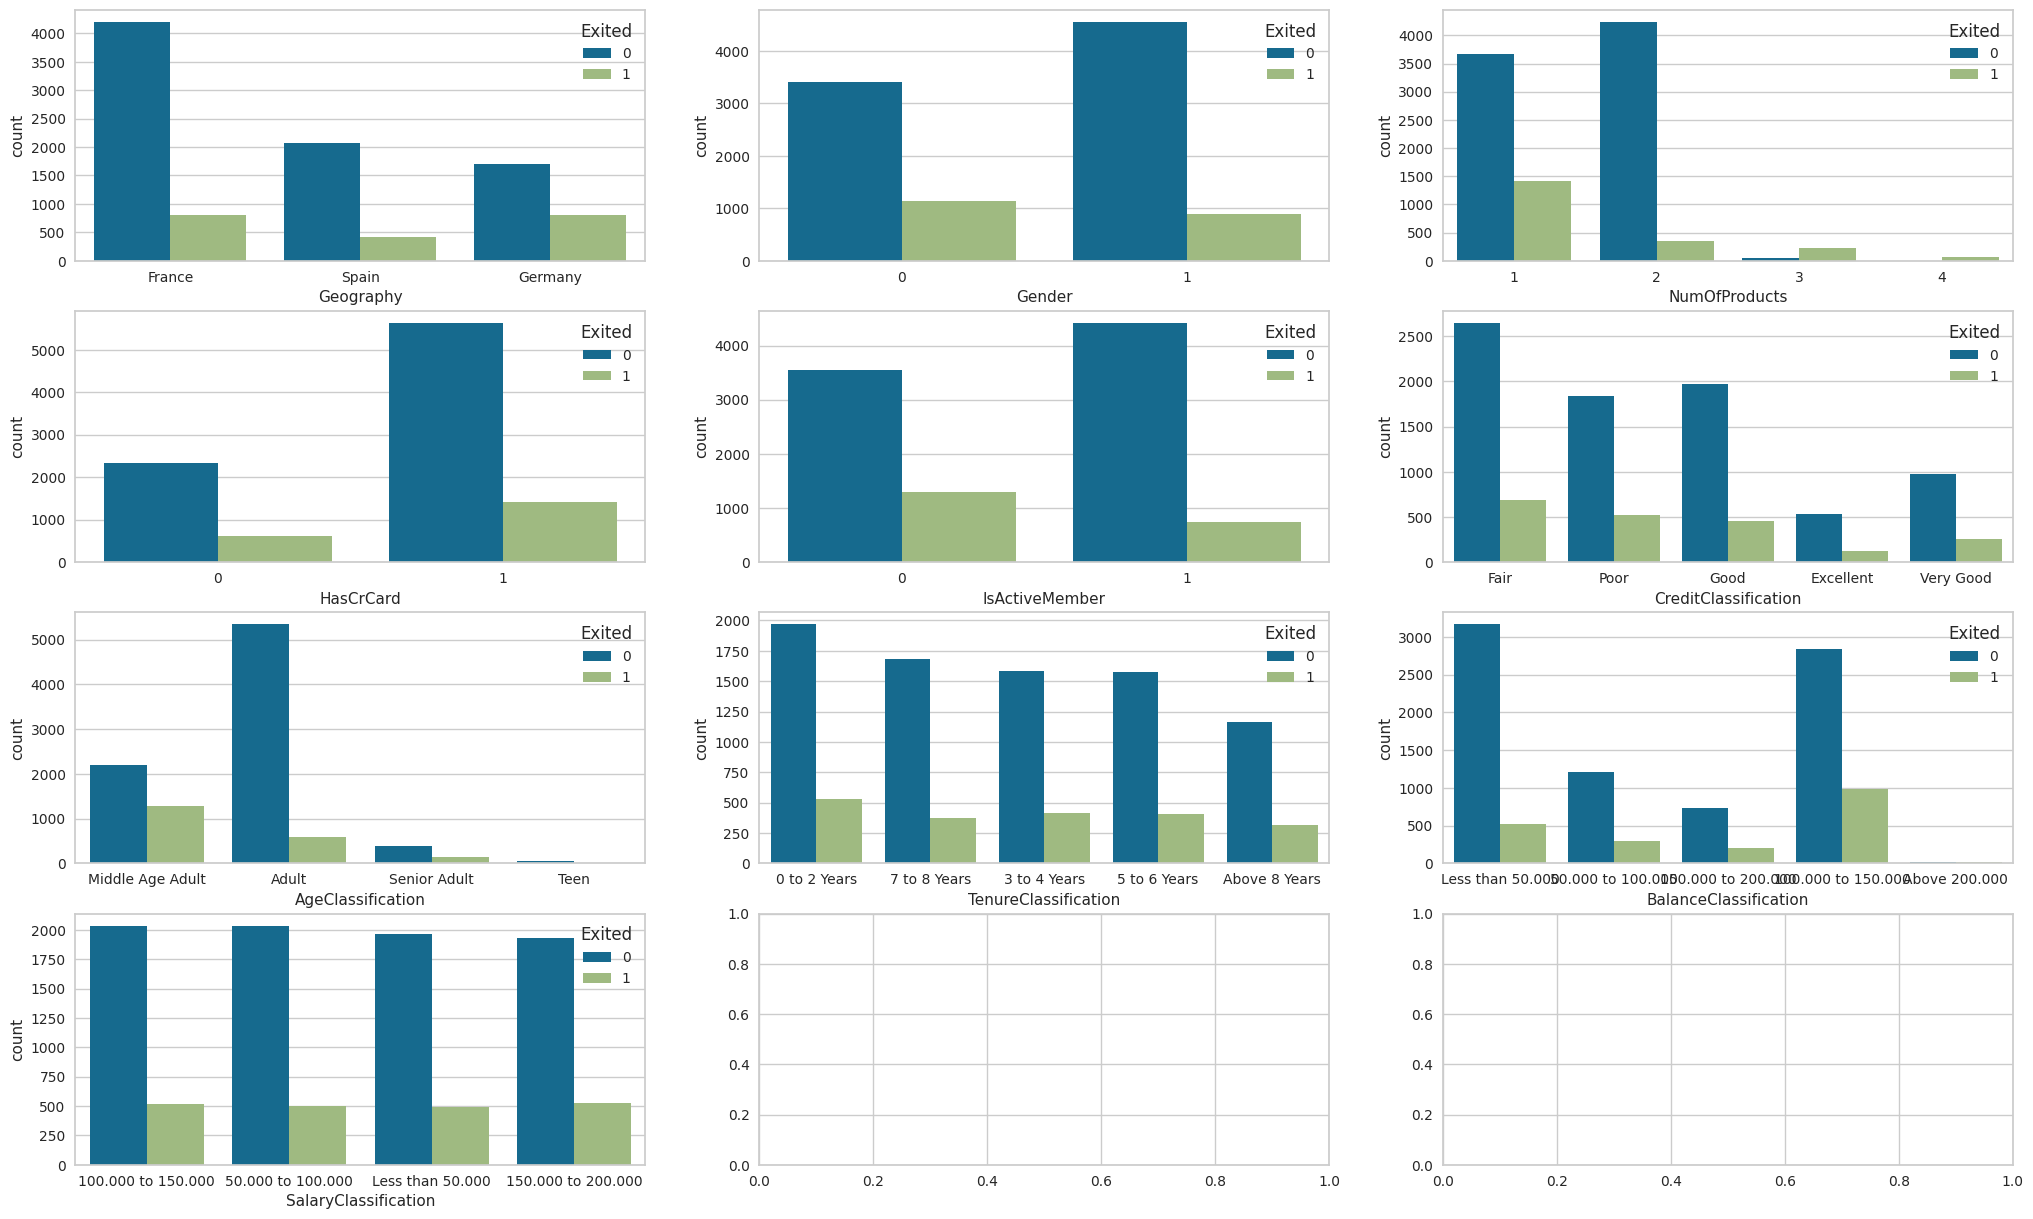

In [52]:
fig, axarr = plt.subplots(4, 3, figsize=(25, 15))
sns.countplot(x='Geography', hue = 'Exited',data = df_total, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df_total, ax=axarr[0][1])
sns.countplot(x='NumOfProducts', hue = 'Exited',data = df_total, ax=axarr[0][2])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df_total, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df_total, ax=axarr[1][1])
sns.countplot(x='CreditClassification', hue = 'Exited',data = df_total, ax=axarr[1][2])
sns.countplot(x='AgeClassification', hue = 'Exited',data = df_total, ax=axarr[2][0])
sns.countplot(x='TenureClassification', hue = 'Exited',data = df_total, ax=axarr[2][1])
sns.countplot(x='BalanceClassification', hue = 'Exited',data = df_total, ax=axarr[2][2])
sns.countplot(x='SalaryClassification', hue = 'Exited',data = df_total, ax=axarr[3][0])

-------

# Identification Of Problems To Analyze

In [53]:
df_total_ = df_total.copy()

**Loading for Whole Dataset :**

In [54]:
df_total_

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
0,15634602,France,0,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000,100.000 to 150.000
1,15647311,Spain,0,608,41,1,83807.86,1,0,1,112542.58,0,Fair,Middle Age Adult,0 to 2 Years,50.000 to 100.000,100.000 to 150.000
2,15619304,France,0,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000,100.000 to 150.000
3,15701354,France,0,699,39,1,0.00,2,0,0,93826.63,0,Good,Adult,0 to 2 Years,Less than 50.000,50.000 to 100.000
4,15737888,Spain,0,850,43,2,125510.82,1,1,1,79084.10,0,Excellent,Middle Age Adult,0 to 2 Years,100.000 to 150.000,50.000 to 100.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,France,1,771,39,5,0.00,2,1,0,96270.64,0,Very Good,Adult,5 to 6 Years,Less than 50.000,50.000 to 100.000
9996,15569892,France,1,516,35,10,57369.61,1,1,1,101699.77,0,Poor,Adult,Above 8 Years,50.000 to 100.000,100.000 to 150.000
9997,15584532,France,0,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000,Less than 50.000
9998,15682355,Germany,1,772,42,3,75075.31,2,1,0,92888.52,1,Very Good,Middle Age Adult,3 to 4 Years,50.000 to 100.000,50.000 to 100.000


**Loading for Churn Dataset :**

In [55]:
df_churn_eda_ident = df_total_.loc[df_total_['Exited'] == 1]
df_churn_eda_ident

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
0,15634602,France,0,619,42,2,0.00,1,1,1,101348.88,1,Fair,Middle Age Adult,0 to 2 Years,Less than 50.000,100.000 to 150.000
2,15619304,France,0,502,42,8,159660.80,3,1,0,113931.57,1,Poor,Middle Age Adult,7 to 8 Years,150.000 to 200.000,100.000 to 150.000
5,15574012,Spain,1,645,44,8,113755.78,2,1,0,149756.71,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9981,15672754,Germany,1,498,42,3,152039.70,1,1,1,53445.17,1,Poor,Middle Age Adult,3 to 4 Years,150.000 to 200.000,50.000 to 100.000
9982,15768163,Germany,0,655,46,7,137145.12,1,1,0,115146.40,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9991,15769959,France,0,597,53,4,88381.21,1,1,0,69384.71,1,Fair,Middle Age Adult,3 to 4 Years,50.000 to 100.000,50.000 to 100.000
9997,15584532,France,0,709,36,7,0.00,1,0,1,42085.58,1,Good,Adult,7 to 8 Years,Less than 50.000,Less than 50.000


### Aggregation by geography

#### Total customers per Geography

In [56]:
df_total_cust_geo = df_total_.groupby(['Geography']).agg({'CustomerId':'count'}).rename(columns = {'Geography':'Geography','CustomerId':'Total Customer'}).reset_index()

df_total_cust_geo['Percentage'] =  round(df_total_cust_geo['Total Customer']/df_total_cust_geo['Total Customer'].sum(),3)
df_total_cust_geo

,Geography,Total Customer,Percentage
0,France,5014,0.501
1,Germany,2509,0.251
2,Spain,2477,0.248


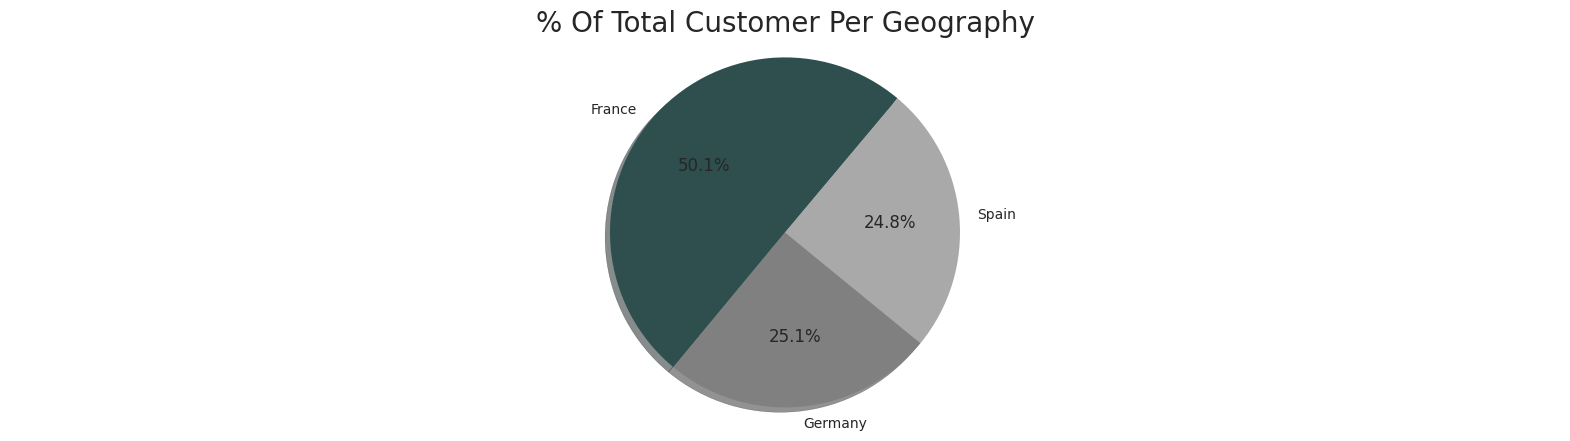

In [57]:
my_colors = ['darkslategray','Gray','darkgray']
my_explode = (0, 0, 0)


plt.figure(figsize=(20,5))
plt.pie(df_total_cust_geo['Percentage'], labels = df_total_cust_geo['Geography'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Customer Per Geography',fontsize = 20)
plt.axis('equal')
plt.show()

> **Inference** :
> - Half of the total customers are in **France**

#### Total churned customers per Geography against total customers

In [58]:
df_total_joined = df_total_.groupby(['Geography']).agg({'CustomerId':'count'}).rename(columns = {'Geography':'Geography','CustomerId':'Total Customer'})
df_churn_joined = df_churn_eda_ident.groupby(['Geography']).agg({'CustomerId':'count'}).rename(columns = {'Geography':'Geography','CustomerId':'Churn Customer'})

df_geo_agg = df_churn_joined.merge(df_total_joined, how = 'inner', on = 'Geography').reset_index()
df_geo_agg

,Geography,Churn Customer,Total Customer
0,France,810,5014
1,Germany,814,2509
2,Spain,413,2477


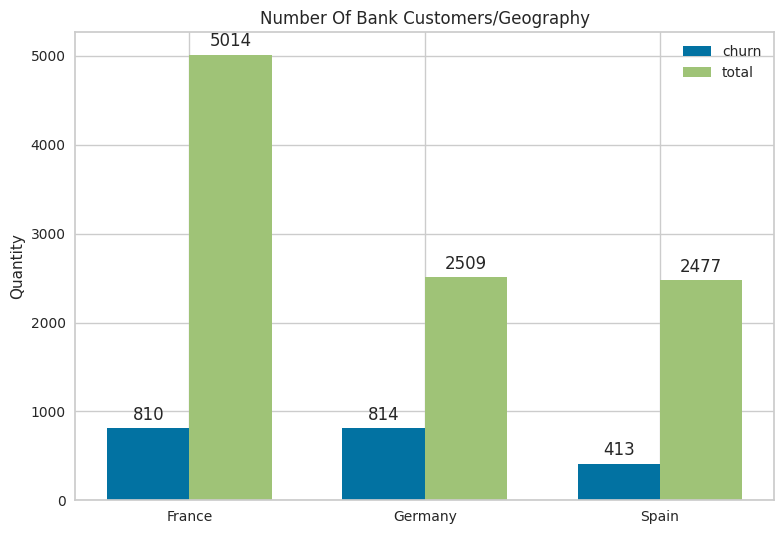

In [59]:
labels = ['France', 'Germany', 'Spain']
churn_customers = [810, 814, 413]
total_customers = [5014, 2509,2477]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, churn_customers, width, label='churn')
rects2 = ax.bar(x + width/2, total_customers, width, label='total')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_title('Number Of Bank Customers/Geography')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in rects:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

In [60]:
df_geo_agg['Percentage'] =  round(df_geo_agg['Churn Customer']/df_geo_agg['Total Customer'],3)
df_geo_agg

,Geography,Churn Customer,Total Customer,Percentage
0,France,810,5014,0.162
1,Germany,814,2509,0.324
2,Spain,413,2477,0.167


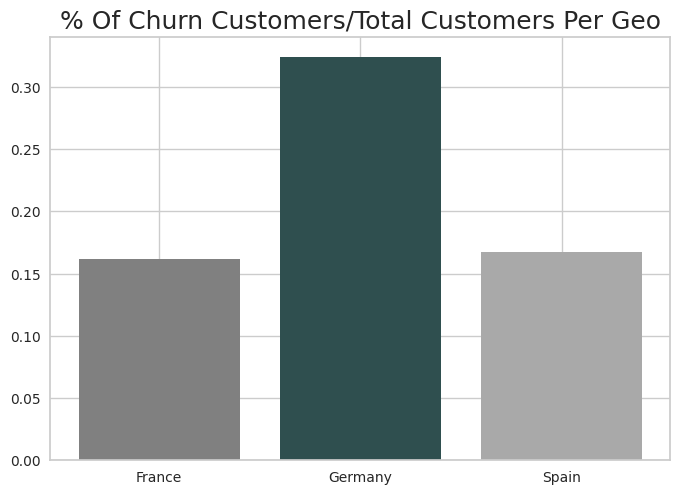

In [61]:
my_colors = ['Gray', 'darkslategray','darkgray']
my_explode = (0, 0.1, 0)

plt.bar(df_geo_agg['Geography'], df_geo_agg['Percentage'], color=my_colors)


plt.title('% Of Churn Customers/Total Customers Per Geo',fontsize = 18)
plt.show()

#### Total churned customers per geography against total "churned" customers

In [62]:
df_geo_churn = df_churn_eda_ident.groupby(['Geography']).agg({'CustomerId':'count'}).rename(columns = {'Geography':'Geography','CustomerId':'Churn Customer'}).reset_index()

df_geo_churn['Percentage'] =  round(df_geo_churn['Churn Customer']/df_geo_churn['Churn Customer'].sum(),3)
df_geo_churn

,Geography,Churn Customer,Percentage
0,France,810,0.398
1,Germany,814,0.400
2,Spain,413,0.203


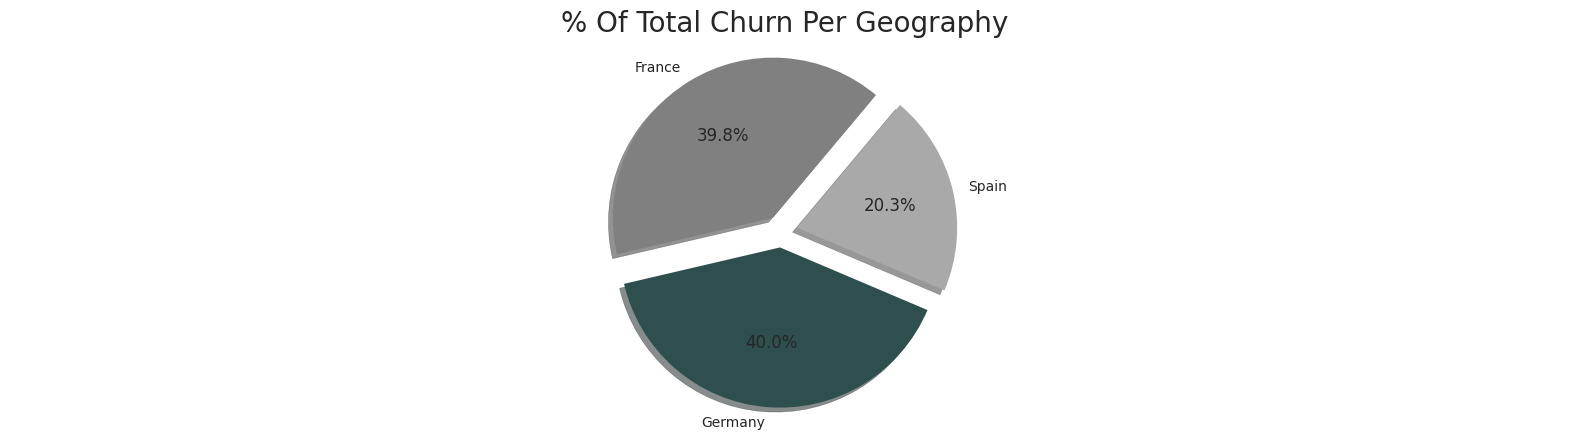

In [63]:
my_colors = ['Gray','darkslategray','darkgray']
my_explode = (0.1, 0.1, 0.1)


plt.figure(figsize=(20,5))
plt.pie(df_geo_churn['Percentage'], labels = df_geo_churn['Geography'], autopct='%1.1f%%', startangle=50, shadow = True, colors=my_colors, explode=my_explode)
plt.title('% Of Total Churn Per Geography',fontsize = 20)
plt.axis('equal')
plt.show()

From the analysis that has been carried out, it can be concluded that Germany has the highest percentage of exits by population per country compared to others (32.4%). In addition, Germany also has the highest percentage of customers who leave the bank based on the number of customers who leave (40%).

Loading For "Germany" Dataset :

In [64]:
df_total_ger = df_total_.loc[df_total_['Geography'] == 'Germany']
df_total_ger

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,143129.41,2,0,1,64327.26,0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,136815.64,1,1,1,170041.95,0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,141349.43,1,1,1,100187.43,0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,137145.12,1,1,0,115146.40,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,90602.42,2,1,1,51695.41,0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,183579.54,2,0,1,34047.54,0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,35016.60,1,1,0,53667.08,0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


#### Inference

> - Most of the customer population is from **France**, but the **highest percentage of customers churned** is **Germany**



> **Problem Identification** :
>> - How  characteristics of "Churned" and "Retained" customers in Germany ?
>> - How is customer segmentation in Germany ?
>> - What should management implement to reduce customer churn rate in Germany ?

# New Dataset : Germany Dataset

In [65]:
df_germany = df_total_ger.copy()

In [66]:
df_germany.head()

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,143129.41,2,0,1,64327.26,0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,136815.64,1,1,1,170041.95,0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,141349.43,1,1,1,100187.43,0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000


##Outliers Identification

In [67]:
df_out = df_germany.copy()

In [68]:
df_out.columns

Index(['CustomerId', 'Geography', 'Gender', 'CreditScore', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited', 'CreditClassification',
       'AgeClassification', 'TenureClassification', 'BalanceClassification',
       'SalaryClassification'],
      dtype='object')

Boxplot Identification :

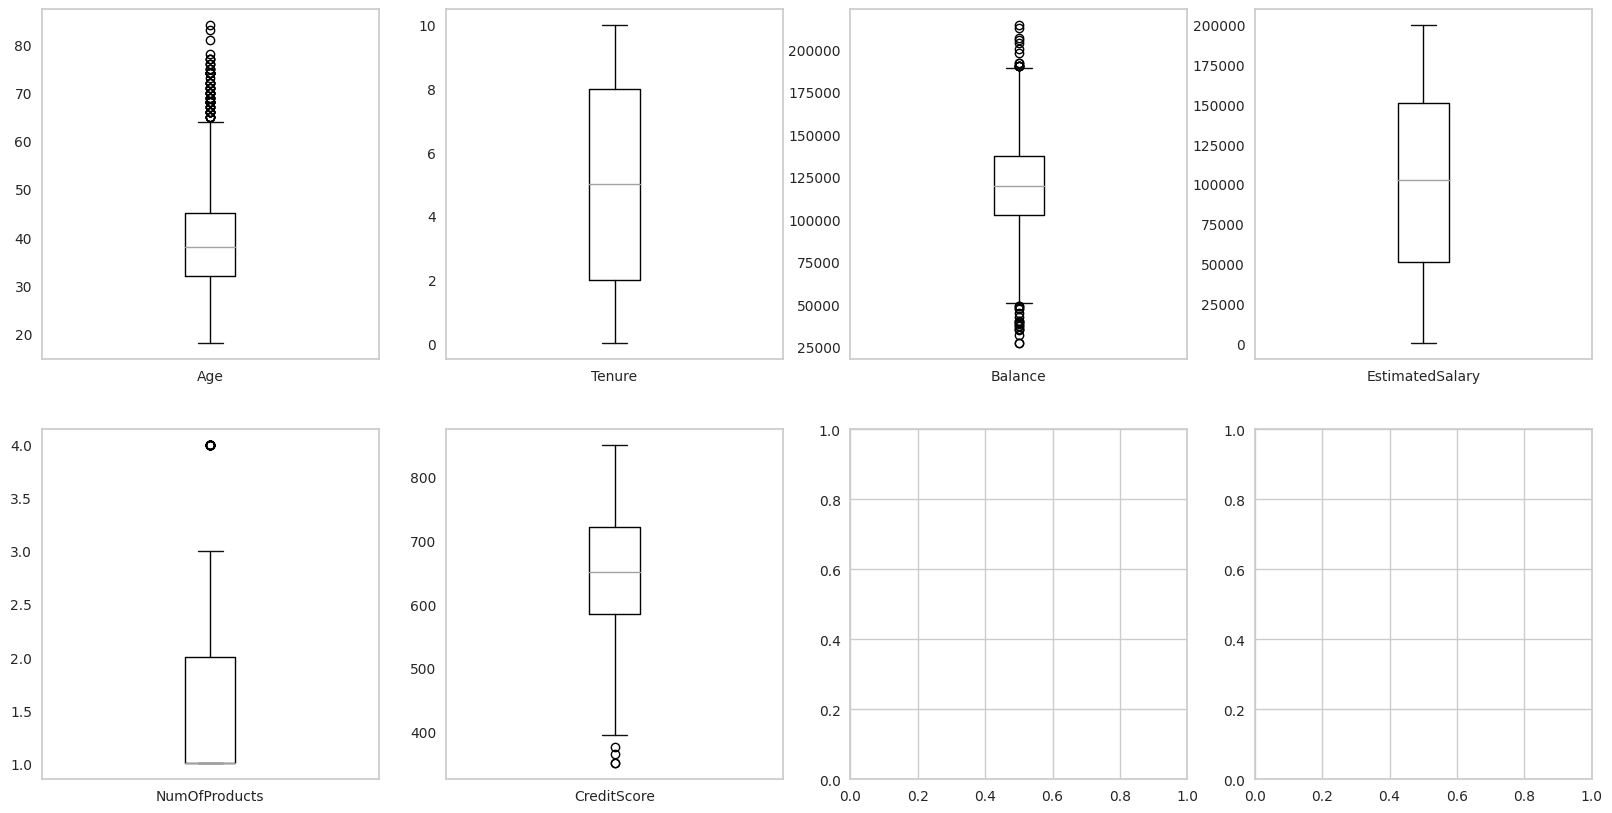

In [69]:
column_num = ['Age','Tenure','Balance','EstimatedSalary','NumOfProducts', 'CreditScore']

fig, axes = plt.subplots(nrows=2, ncols=4,figsize=(20,10))
for i,col in enumerate(column_num):
    a = df_out.boxplot(col, ax=axes.flatten()[i],grid=False)
plt.show()


Identification of data distribution :

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'EstimatedSalary'}>],
       [<Axes: title={'center': 'CreditScore'}>, <Axes: >]], dtype=object)

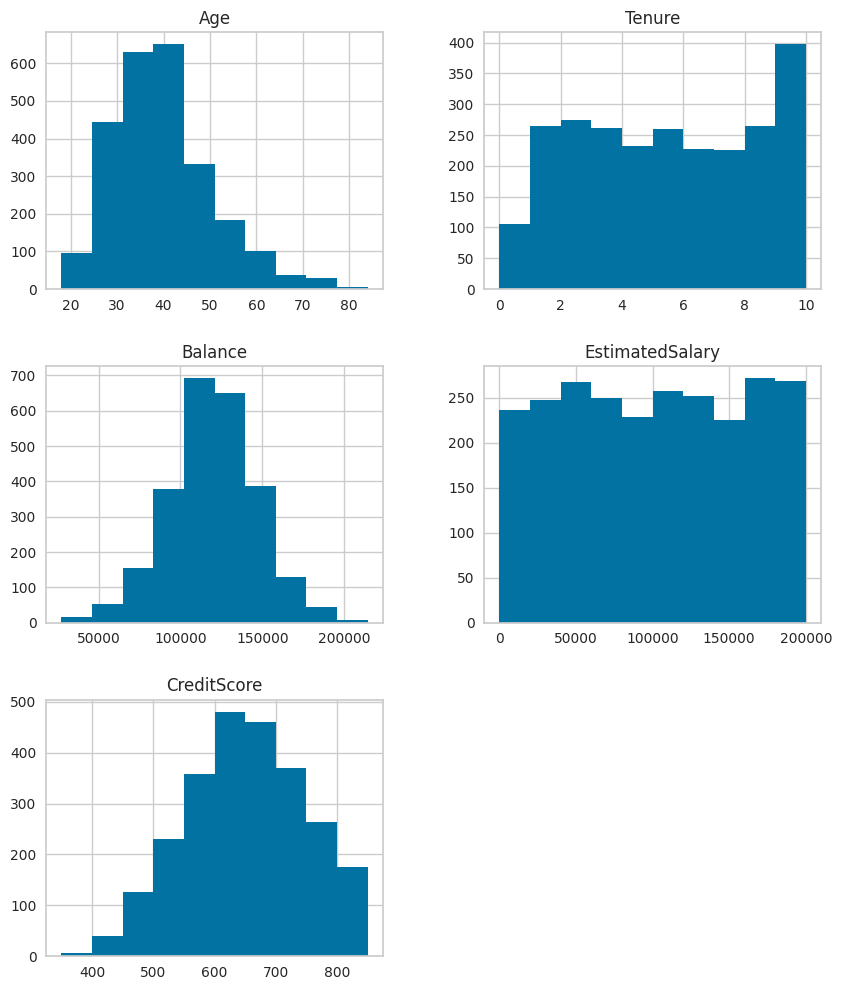

In [70]:
df_out[['Age','Tenure','Balance','EstimatedSalary', 'CreditScore']].hist(figsize=(10,12))

### **Handling Outliers For Balance Attribute**

Normal distribution plot for the **Balance** attribute :

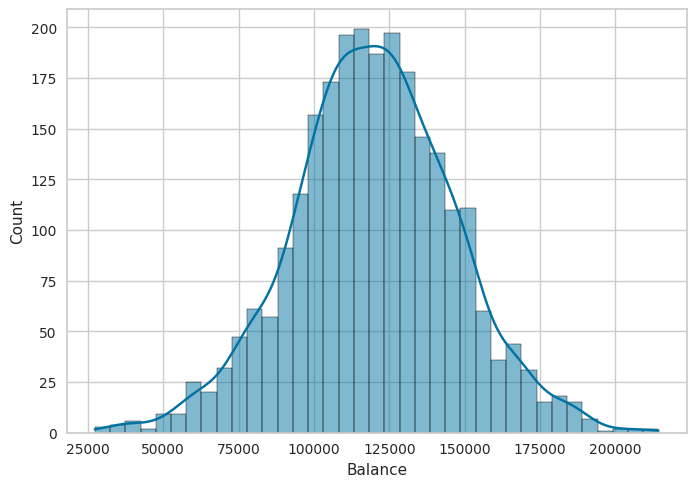

In [71]:
norm = df_out['Balance']
sns.histplot(norm, kde=True)
plt.show()

> **Inference** :
> - The normal distribution for the Balance attribute is met, so that data analysis can use the basic assumptions of normality

Boxplot for the **Balance** attribute :

<Axes: >

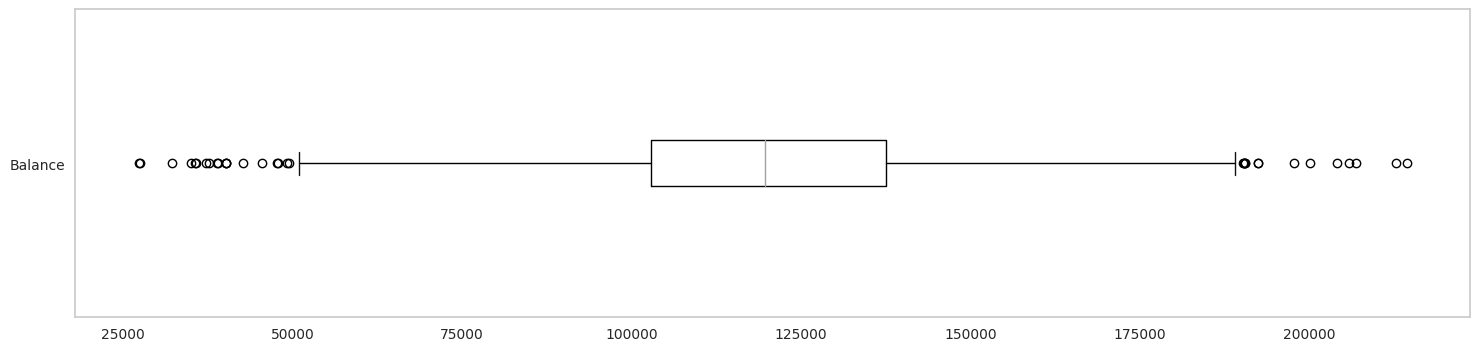

In [72]:
df_out.boxplot(column=['Balance'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

### **Handling Outliers For Age Attribute**

Normal distribution plot for the **Age** attribute :

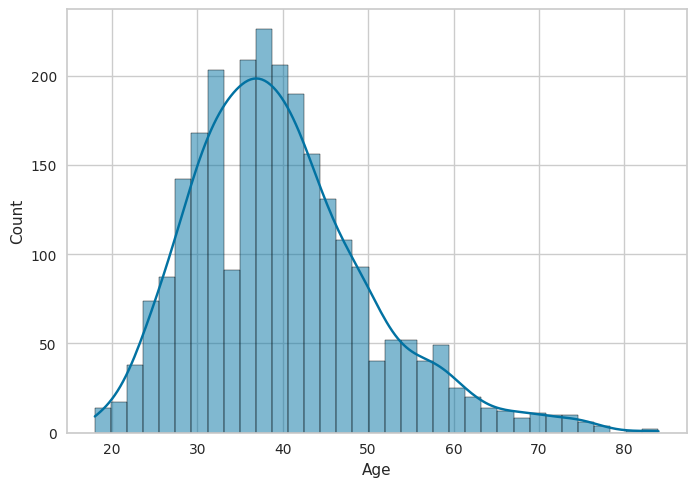

In [73]:
norm = df_out['Age']
sns.histplot(norm, kde=True)
plt.show()

> **INQUIRY** :
>> - Positive skew, where customer age is distributed over 65 years old

Detects values ​​(outliers) that spread above the **Upper Limit** and spread below the **Lower Limit** for the **Age** attribute, using the **Interquartile Range (IQR)**:

In [74]:
Q1,Q3 = np.percentile(df_out['Age'] , [25,75])
print('Q1:', Q1)
print('Q3:', Q3)

IQR = Q3 - Q1
print('IQR:', IQR)

upper = Q3 + 1.5*IQR
print('Upper Bound:', upper)

lower = Q1 - 1.5*IQR
print('Lower Bound:', lower)

Q1: 32.0
Q3: 45.0
IQR: 13.0
Upper Bound: 64.5
Lower Bound: 12.5


Boxplot for the **Age** attribute :

<Axes: >

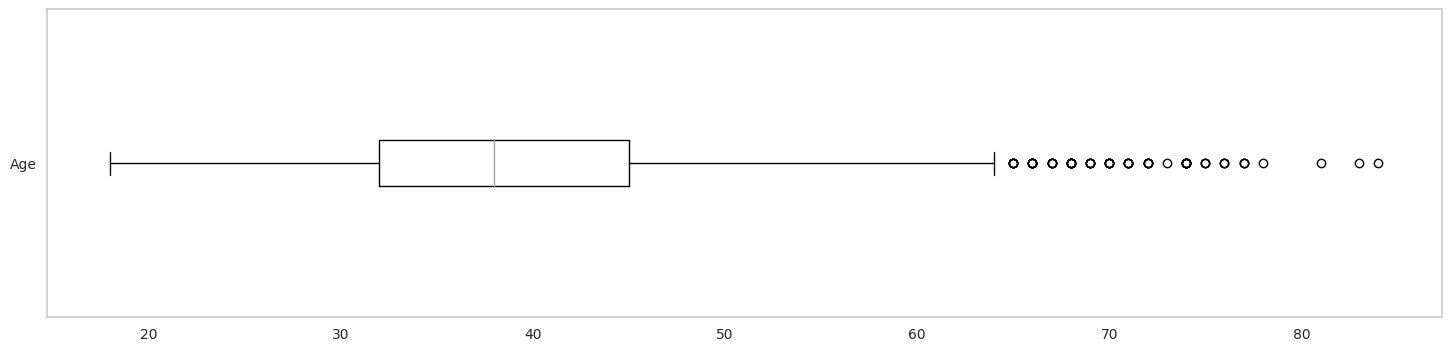

In [75]:
df_out.boxplot(column=['Age'],fontsize=10, rot=0,grid=False,figsize=(18,4),vert=False)

**Remove customers who are > 65 years old from the data set :**

In [76]:
# Handling Outlier For The Age Attribute
fil_age = (df_out['Age'] > 65)

# Number of outliers for the age attribute
df_age_out = df_out.loc[fil_age]

print("Number of outliers for the age attribute: :",len(df_age_out), "row data, as follows :\n")

# Identify outlier
df_age_out.sort_values(by = 'Age', ascending = True)

Number of outliers for the age attribute: : 64 row data, as follows :



,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7138,15809837,Germany,0,430,66,6,135392.31,2,1,1,172852.06,1,Poor,Senior Adult,5 to 6 Years,100.000 to 150.000,150.000 to 200.000
4147,15712409,Germany,1,749,66,6,182532.23,2,1,1,195429.92,0,Very Good,Senior Adult,5 to 6 Years,150.000 to 200.000,150.000 to 200.000
6709,15587647,Germany,0,850,66,0,127120.62,1,0,1,118929.64,1,Excellent,Senior Adult,0 to 2 Years,100.000 to 150.000,100.000 to 150.000
6970,15761286,Germany,0,696,66,7,119499.42,2,1,1,174027.30,0,Good,Senior Adult,7 to 8 Years,100.000 to 150.000,150.000 to 200.000
3940,15659736,Germany,1,716,66,5,121411.90,1,0,0,10070.40,1,Good,Senior Adult,5 to 6 Years,100.000 to 150.000,Less than 50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6721,15715638,Germany,1,824,77,3,27517.15,2,0,1,2746.41,0,Excellent,Senior Adult,3 to 4 Years,Less than 50.000,Less than 50.000
9671,15636061,Germany,1,649,78,4,68345.86,2,1,1,142566.75,0,Fair,Senior Adult,3 to 4 Years,50.000 to 100.000,100.000 to 150.000
4931,15772341,Germany,1,682,81,6,122029.15,1,1,1,50783.88,0,Good,Senior Adult,5 to 6 Years,100.000 to 150.000,50.000 to 100.000
9309,15621644,Germany,1,678,83,6,123356.63,1,0,1,92934.41,0,Good,Senior Adult,5 to 6 Years,100.000 to 150.000,50.000 to 100.000


In [77]:
df_age_clean = df_out.loc[~(fil_age)]
df_age_clean

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,143129.41,2,0,1,64327.26,0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,136815.64,1,1,1,170041.95,0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,141349.43,1,1,1,100187.43,0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,137145.12,1,1,0,115146.40,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,90602.42,2,1,1,51695.41,0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,183579.54,2,0,1,34047.54,0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,35016.60,1,1,0,53667.08,0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


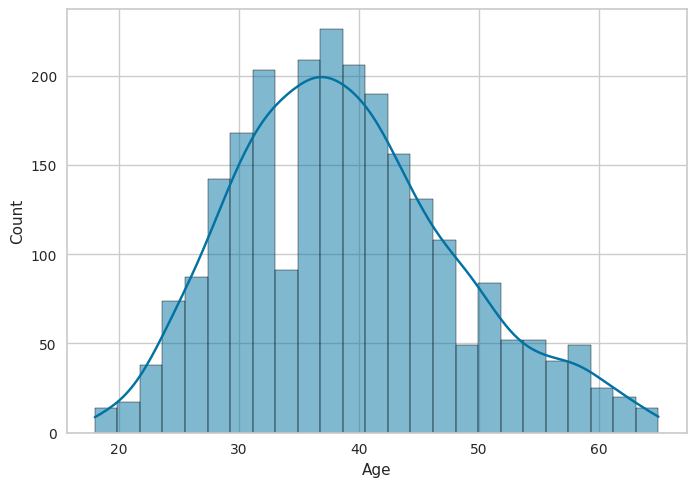

In [78]:
norm = df_age_clean['Age']
sns.histplot(norm, kde=True)
plt.show()

### **Handling Outliers For Estimated Salary Attribute :**

Delete rows containing customers with estimated salaries under 5000 per year :

*We take 5000 Euro per year assumption that insurance, housing, meals, etc. have been accommodated and living frugally*

In [79]:
# Handling Outlier For The Age Attribute
fil_salary = (df_age_clean['EstimatedSalary'] < 5000)

# Number of outliers for the age attribute
df_sal_out = df_age_clean.loc[fil_salary]

print("Number of outliers for the EstimatedSalary attribute: :",len(df_sal_out), "row data, as follows :\n")

# Identify outlier
df_sal_out.sort_values(by = 'EstimatedSalary', ascending = True)

Number of outliers for the EstimatedSalary attribute: : 63 row data, as follows :



,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
2362,15791053,Germany,1,709,45,4,122917.71,1,1,1,11.58,1,Good,Middle Age Adult,3 to 4 Years,100.000 to 150.000,Less than 50.000
9010,15786463,Germany,0,645,59,8,121669.93,2,0,0,91.75,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,Less than 50.000
1462,15566211,Germany,0,616,41,1,103560.57,1,1,0,236.45,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
2046,15733429,Germany,1,520,34,8,120018.86,2,1,1,343.38,0,Poor,Adult,7 to 8 Years,100.000 to 150.000,Less than 50.000
925,15636731,Germany,0,714,36,1,101609.01,2,1,1,447.73,0,Good,Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7722,15570086,Germany,1,684,18,9,90544.00,1,0,1,4777.23,0,Good,Teen,Above 8 Years,50.000 to 100.000,Less than 50.000
7124,15697460,Germany,1,596,34,4,99441.21,2,0,1,4802.27,0,Fair,Adult,3 to 4 Years,50.000 to 100.000,Less than 50.000
9206,15611767,Germany,0,624,52,0,133723.43,1,0,0,4859.59,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
5388,15669664,Germany,1,574,54,1,99774.50,1,0,0,4896.11,1,Poor,Middle Age Adult,0 to 2 Years,50.000 to 100.000,Less than 50.000


In [80]:
df_sal_clean = df_age_clean.loc[~(fil_salary)]
df_sal_clean

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,143129.41,2,0,1,64327.26,0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,136815.64,1,1,1,170041.95,0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,141349.43,1,1,1,100187.43,0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,137145.12,1,1,0,115146.40,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,90602.42,2,1,1,51695.41,0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,183579.54,2,0,1,34047.54,0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,35016.60,1,1,0,53667.08,0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


# EDA : Germany Dataset

In [81]:
df_germany_clean = df_sal_clean.copy()

In [82]:
df_germany_clean

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,115046.74,4,1,0,119346.88,1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,143129.41,2,0,1,64327.26,0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,132602.88,1,1,0,5097.67,1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,136815.64,1,1,1,170041.95,0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,141349.43,1,1,1,100187.43,0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,137145.12,1,1,0,115146.40,1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,90602.42,2,1,1,51695.41,0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,183579.54,2,0,1,34047.54,0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,35016.60,1,1,0,53667.08,0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


## Statistic Descriptive

In [83]:
df_germany_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2382 entries, 7 to 9998
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CustomerId             2382 non-null   int64  
 1   Geography              2382 non-null   object 
 2   Gender                 2382 non-null   int64  
 3   CreditScore            2382 non-null   int64  
 4   Age                    2382 non-null   int64  
 5   Tenure                 2382 non-null   int64  
 6   Balance                2382 non-null   float64
 7   NumOfProducts          2382 non-null   int64  
 8   HasCrCard              2382 non-null   int64  
 9   IsActiveMember         2382 non-null   int64  
 10  EstimatedSalary        2382 non-null   float64
 11  Exited                 2382 non-null   int64  
 12  CreditClassification   2382 non-null   object 
 13  AgeClassification      2382 non-null   object 
 14  TenureClassification   2382 non-null   object 
 15  BalanceCl

### For Numerical Attribute

In [84]:
df_numerical = df_germany_clean[['CustomerId','CreditScore','Balance','EstimatedSalary','Age']]

df_numerical_mean = df_numerical.describe()

# Added Kurtosis, Skewness, and Variance
df_numerical_mean.loc['Kurtosis'] = df_numerical[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].kurt()
df_numerical_mean.loc['Skewness'] = df_numerical[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].skew()
df_numerical_mean.loc['Variance'] = df_numerical[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].var()

# Reset the value format in the EDA Table
pd.set_option('display.float_format', '{:,}'.format)

# Pop up a new EDA Num table
df_numerical_mean = round(df_numerical_mean,2)
df_numerical_mean.T

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Variance
CustomerId,"2,382.0","15,690,934.03","73,129.3","15,565,779.0","15,627,893.0","15,690,677.5","15,755,235.5","15,815,656.0",-1.22,-0.01,"5,347,894,118.56"
CreditScore,"2,382.0",651.32,98.1,350.0,584.0,651.0,722.75,850.0,-0.45,-0.08,"9,624.29"
Balance,"2,382.0","119,943.49","26,936.02","32,197.64","102,957.01","119,845.85","137,724.07","214,346.96",0.27,-0.02,"725,549,122.23"
EstimatedSalary,"2,382.0","103,770.15","56,673.99","5,066.76","54,362.36","104,167.22","153,037.65","199,970.74",-1.22,-0.0,"3,211,940,815.58"
Age,"2,382.0",38.96,9.3,18.0,32.0,38.0,45.0,65.0,-0.17,0.44,86.47


#### Mode - Central Tendency For A Particular Attribute

**The average distribution of the data for the following attributes uses the assumption of the Mode - Central Tendency :**

In [85]:
df_numerical_mode = df_germany_clean[['Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

print('Mode Value For Gender attribute is           :', mode(df_numerical_mode['Gender']),'\n')
print('Mode Value For Age attribute is              :', mode(df_numerical_mode['Age']),'\n')
print('Mode Value For Tenure attribute is           :', mode(df_numerical_mode['Tenure']),'\n')
print('Mode Value For NumOfProducts attribute is    :', mode(df_numerical_mode['NumOfProducts']),'\n')
print('Mode Value For HasCrCard attribute is        :', mode(df_numerical_mode['HasCrCard']),'\n')
print('Mode Value For IsActiveMember attribute is   :', mode(df_numerical_mode['IsActiveMember']),'\n')
print('Mode Value For Exited attribute is           :', mode(df_numerical_mode['Exited']))

Mode Value For Gender attribute is           : 1 

Mode Value For Age attribute is              : 37 

Mode Value For Tenure attribute is           : 2 

Mode Value For NumOfProducts attribute is    : 1 

Mode Value For HasCrCard attribute is        : 1 

Mode Value For IsActiveMember attribute is   : 0 

Mode Value For Exited attribute is           : 0


### For Categorical Attribute

In [86]:
df_cat_ger = df_germany_clean.describe(exclude=np.number)
df_cat_ger.T

,count,unique,top,freq
Geography,2382,1,Germany,2382
CreditClassification,2382,5,Fair,815
AgeClassification,2382,4,Adult,1323
TenureClassification,2382,5,0 to 2 Years,612
BalanceClassification,2382,5,100.000 to 150.000,1569
SalaryClassification,2382,4,100.000 to 150.000,623


### Identification Total "Germany" Customer - All Attribute

<Axes: xlabel='SalaryClassification', ylabel='count'>

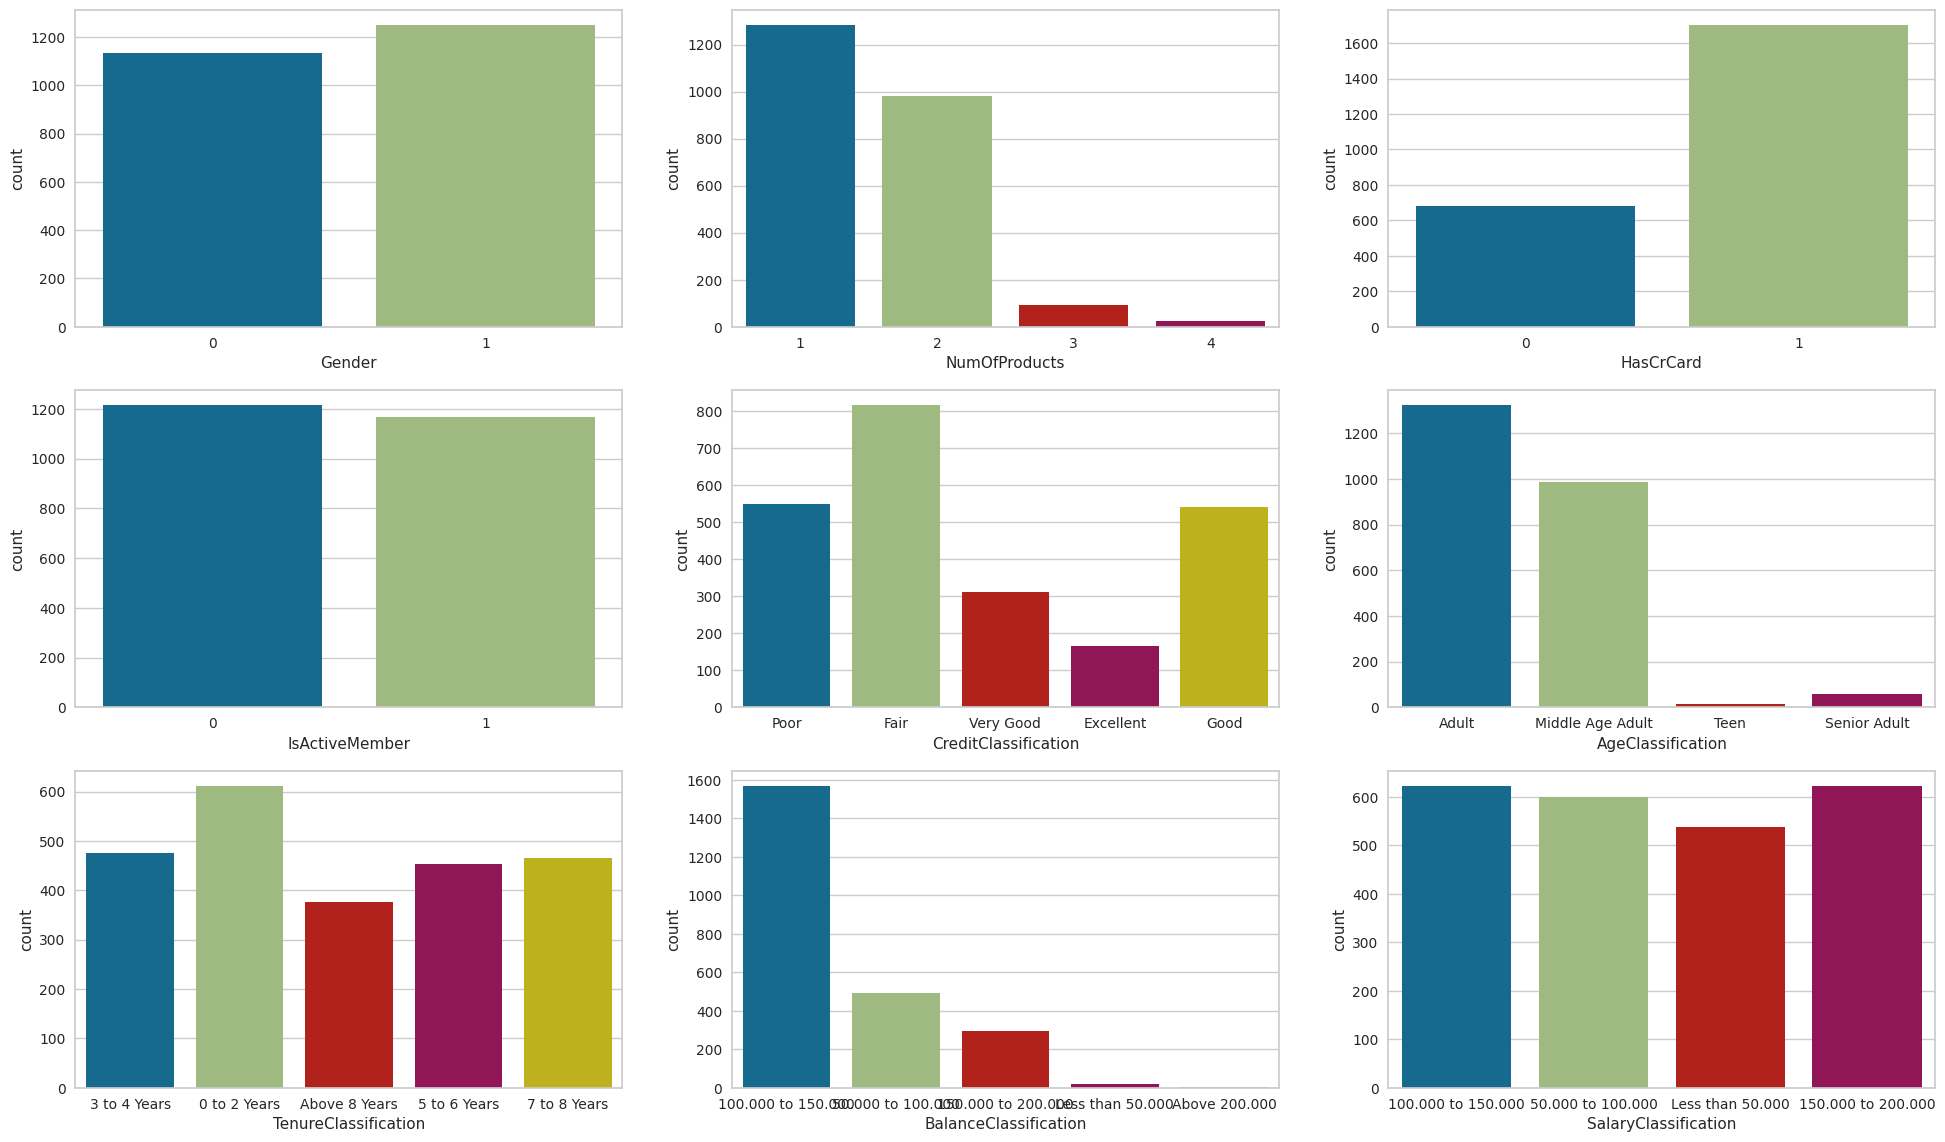

In [87]:
fig, axarr = plt.subplots(3, 3, figsize=(24, 14))
sns.countplot(x='Gender', data = df_germany_clean, ax=axarr[0][0])
sns.countplot(x='NumOfProducts', data = df_germany_clean, ax=axarr[0][1])
sns.countplot(x='HasCrCard', data = df_germany_clean, ax=axarr[0][2])
sns.countplot(x='IsActiveMember', data = df_germany_clean, ax=axarr[1][0])
sns.countplot(x='CreditClassification', data = df_germany_clean, ax=axarr[1][1])
sns.countplot(x='AgeClassification', data = df_germany_clean, ax=axarr[1][2])
sns.countplot(x='TenureClassification', data = df_germany_clean, ax=axarr[2][0])
sns.countplot(x='BalanceClassification', data = df_germany_clean, ax=axarr[2][1])
sns.countplot(x='SalaryClassification', data = df_germany_clean, ax=axarr[2][2])

**Percentage of customers per Age Classification :**

In [88]:
df_germany_clean['AgeClassification'].value_counts()

AgeClassification
Adult               1323
Middle Age Adult     987
Senior Adult          59
Teen                  13
Name: count, dtype: int64

*The largest customer age classification is for* **Adult** and **Middle Age Adult**

**How many credit card users are active customers :**

In [89]:
grouped_germany__ = df_germany_clean.groupby('HasCrCard').agg('count')['CustomerId'].reset_index()

grouped_germany__

,HasCrCard,CustomerId
0,0,679
1,1,1703


In [90]:
df_credit_agg = df_germany_clean.groupby(['HasCrCard','IsActiveMember']).agg({'CustomerId':'count'})
df_credit_agg = df_credit_agg.reset_index()
print(df_credit_agg)

   HasCrCard  IsActiveMember  CustomerId
0          0               0         329
1          0               1         350
2          1               0         885
3          1               1         818


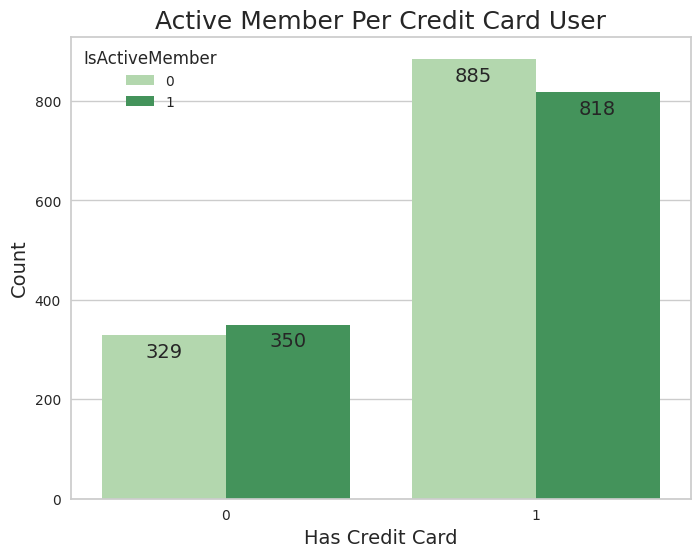

In [91]:
# code for annotated barplot
plt.figure(figsize=(8, 6))
splot = sns.barplot(x="HasCrCard", y="CustomerId", hue ='IsActiveMember',
                    data=df_credit_agg, palette='Greens')

plt.ylabel("Count", size=14)
plt.xlabel("Has Credit Card", size=14)
plt.title("Active Member Per Credit Card User", size=18)
for p in splot.patches:
    splot.annotate(format(round(p.get_height()), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=14,
                   xytext=(0, -12),
                   textcoords='offset points')

### **Inference (for Germany dataset)**
> - Most bank customers in Germany are **New Customers**, where **>25% of tenure classifications are 0 - 2 years**
> - Most of customers credit scores (57.3%) in Germany **haven't reach a "Good" level**
> - **The number of male customers is more dominant** than the number of female customers
> - So far, the bank's promotions have only succeeded in attracting customers in the **adult category (20 - 39 years)**, followed by **middle-aged customers (40 - 59 years)**
> - Total Customers in Germany are classified according to 4 salary classifications, with **almost equal percentages for all 4 categories**
> - The average balance of a German customer in the bank is 100,000
> - Most customers decide as users only for **1 type of product** provided by the bank
> - At this point, the Bank is facing an active customer crisis, where **>50% are Inactive members**
> - More than 70% of customers have credit cards, but **only 48% are active members** (assuming: active credit card users). **More percentage of active members for customers who don't have a credit card**

> **Inferensi (untuk set data Jerman)** :
> - Sebagian besar nasabah bank di Jerman adalah **Nasabah Baru**, di mana **>25% klasifikasi tenurial adalah 0 - 2 tahun**
> - Sebagian besar skor kredit pelanggan (57,3%) di Jerman **belum mencapai level "Baik"**
> - **Jumlah pelanggan pria lebih dominan** daripada jumlah pelanggan wanita
> - Selama ini promosi bank hanya berhasil menjaring nasabah pada kategori **dewasa (20 - 39 tahun)**, disusul **nasabah paruh baya (40 - 59 tahun)**
> - Total Pelanggan di Jerman diklasifikasikan menurut 4 klasifikasi gaji, dengan **persentase yang hampir sama untuk keempat kategori**
> - Saldo rata-rata nasabah Jerman di bank adalah 100.000
> - Sebagian besar nasabah memutuskan sebagai pengguna hanya untuk **1 jenis produk** yang disediakan oleh bank
> - Saat ini Bank sedang menghadapi krisis nasabah aktif, dimana **>50% adalah anggota Tidak Aktif**
> - Lebih dari 70% pelanggan memiliki kartu kredit, tetapi **hanya 48% yang merupakan anggota aktif** (asumsi: pengguna kartu kredit aktif). **Lebih banyak persentase anggota aktif untuk pelanggan yang tidak memiliki kartu kredit**

#### Details Overview : Churned VS Retained Breakdown

In [92]:
df_germany_overview = df_germany_clean.copy()

In [93]:
df_germany_overview

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,"115,046.74",4,1,0,"119,346.88",1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,"143,129.41",2,0,1,"64,327.26",0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,"132,602.88",1,1,0,"5,097.67",1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,"136,815.64",1,1,1,"170,041.95",0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,"141,349.43",1,1,1,"100,187.43",0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,"137,145.12",1,1,0,"115,146.4",1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,"90,602.42",2,1,1,"51,695.41",0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,"183,579.54",2,0,1,"34,047.54",0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,"35,016.6",1,1,0,"53,667.08",0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


In [94]:
df_overview = df_germany_overview.groupby(['Exited']).agg({'CustomerId':'count'})
df_overview = df_overview.reset_index()
print(df_overview)

   Exited  CustomerId
0       0        1604
1       1         778


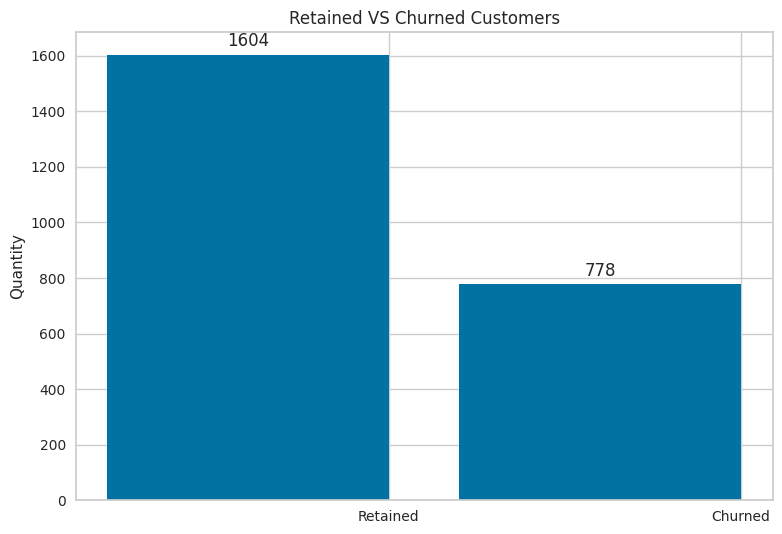

In [95]:
Labelss = ['Retained', 'Churned']
customers = [1604, 778]

x = np.arange(len(Labelss))  # the label locations
width = 0.8  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, customers, width)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Quantity')
ax.set_title('Retained VS Churned Customers')
ax.set_xticks(x)
ax.set_xticklabels(Labelss)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for i in rects:
        height = i.get_height()
        ax.annotate('{}'.format(height),
                    xy=(i.get_x() + i.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)

fig.tight_layout()

plt.show()

**Germany Churn Dataset :**

In [96]:
df_germany_churn = df_germany_overview.loc[df_germany_overview['Exited'] == 1]
df_germany_churn.head()

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,"115,046.74",4,1,0,"119,346.88",1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
16,15737452,Germany,1,653,58,1,"132,602.88",1,1,0,"5,097.67",1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
46,15602280,Germany,0,829,27,9,"112,045.67",1,1,1,"119,708.21",1,Excellent,Adult,Above 8 Years,100.000 to 150.000,100.000 to 150.000
47,15771573,Germany,0,637,39,9,"137,843.8",1,1,1,"117,622.8",1,Fair,Adult,Above 8 Years,100.000 to 150.000,100.000 to 150.000
53,15702298,Germany,1,655,41,8,"125,561.97",1,0,0,"164,040.94",1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,150.000 to 200.000


**Germany Retained Dataset :**

In [97]:
df_germany_retained = df_germany_overview.loc[df_germany_overview['Exited'] == 0]
df_germany_retained.head()

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
15,15643966,Germany,1,616,45,3,"143,129.41",2,0,1,"64,327.26",0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
26,15736816,Germany,1,756,36,2,"136,815.64",1,1,1,"170,041.95",0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,"141,349.43",1,1,1,"100,187.43",0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
32,15750181,Germany,1,553,41,9,"110,112.54",2,0,0,"81,898.81",0,Poor,Middle Age Adult,Above 8 Years,100.000 to 150.000,50.000 to 100.000
39,15585768,Germany,1,582,41,6,"70,349.48",2,0,1,"178,074.04",0,Fair,Middle Age Adult,5 to 6 Years,50.000 to 100.000,150.000 to 200.000


##### For Numerical Attribute

**Germany Churn Dataset :**

In [98]:
df_numerical_churn = df_germany_churn[['CustomerId','CreditScore','Balance','EstimatedSalary','Age','NumOfProducts']]

df_numerical_mean_churn = df_numerical_churn.describe()

# Added Kurtosis, Skewness, and Variance
df_numerical_mean_churn.loc['Kurtosis'] = df_numerical_churn[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age','NumOfProducts']].kurt()
df_numerical_mean_churn.loc['Skewness'] = df_numerical_churn[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age','NumOfProducts']].skew()
df_numerical_mean_churn.loc['Variance'] = df_numerical_churn[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age','NumOfProducts']].var()

# Reset the value format in the EDA Table
pd.set_option('display.float_format', '{:,}'.format)

# Pop up a new EDA Num table
df_numerical_mean_churn = round(df_numerical_mean_churn,2)
df_numerical_mean_churn.T

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Variance
CustomerId,778.0,"15,688,706.22","74,146.5","15,566,030.0","15,625,719.75","15,684,124.5","15,753,292.5","15,815,656.0",-1.23,0.07,"5,497,704,159.62"
CreditScore,778.0,648.01,100.92,350.0,579.25,646.5,726.75,850.0,-0.42,-0.13,"10,184.44"
Balance,778.0,"120,515.68","19,547.64","62,389.03","107,630.03","119,009.8","132,986.0","181,461.48",-0.03,0.14,"382,110,059.36"
EstimatedSalary,778.0,"100,945.23","57,489.61","5,097.67","49,863.82","100,980.05","149,590.06","199,808.1",-1.24,0.04,"3,305,055,816.51"
Age,778.0,44.36,9.08,19.0,38.0,45.0,50.0,65.0,-0.32,-0.1,82.44
NumOfProducts,778.0,1.46,0.81,1.0,1.0,1.0,2.0,4.0,1.61,1.64,0.65


In [99]:
df_numerical_mode_churn= df_germany_clean[['Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

print('Mode Value For Gender attribute is           :', mode(df_numerical_mode_churn['Gender']),'\n')
print('Mode Value For Tenure attribute is           :', mode(df_numerical_mode_churn['Tenure']),'\n')
print('Mode Value For NumOfProducts attribute is    :', mode(df_numerical_mode_churn['NumOfProducts']),'\n')
print('Mode Value For HasCrCard attribute is        :', mode(df_numerical_mode_churn['HasCrCard']),'\n')
print('Mode Value For IsActiveMember attribute is   :', mode(df_numerical_mode_churn['IsActiveMember']),'\n')

Mode Value For Gender attribute is           : 1 

Mode Value For Tenure attribute is           : 2 

Mode Value For NumOfProducts attribute is    : 1 

Mode Value For HasCrCard attribute is        : 1 

Mode Value For IsActiveMember attribute is   : 0 



**Percentage of customers per Age Classification (*churn dataset*) :**

In [100]:
df_germany_churn['AgeClassification'].value_counts()

AgeClassification
Middle Age Adult    510
Adult               232
Senior Adult         35
Teen                  1
Name: count, dtype: int64

**Germany Retained Dataset :**

In [101]:
df_numerical_retained = df_germany_retained[['CustomerId','CreditScore','Balance','EstimatedSalary','Age']]

df_numerical_mean_retained = df_numerical_retained.describe()

# Added Kurtosis, Skewness, and Variance
df_numerical_mean_retained.loc['Kurtosis'] = df_numerical_retained[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].kurt()
df_numerical_mean_retained.loc['Skewness'] = df_numerical_retained[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].skew()
df_numerical_mean_retained.loc['Variance'] = df_numerical_retained[['CustomerId', 'CreditScore', 'Balance', 'EstimatedSalary','Age']].var()

# Reset the value format in the EDA Table
pd.set_option('display.float_format', '{:,}'.format)

# Pop up a new EDA Num table
df_numerical_mean_retained = round(df_numerical_mean_retained,2)
df_numerical_mean_retained.T

,count,mean,std,min,25%,50%,75%,max,Kurtosis,Skewness,Variance
CustomerId,"1,604.0","15,692,014.6","72,629.46","15,565,779.0","15,628,518.5","15,693,710.0","15,756,283.0","15,815,070.0",-1.21,-0.04,"5,275,037,783.79"
CreditScore,"1,604.0",652.92,96.7,405.0,587.0,652.0,720.0,850.0,-0.48,-0.05,"9,350.9"
Balance,"1,604.0","119,665.95","29,870.32","32,197.64","99,735.88","120,622.55","139,737.69","214,346.96",-0.05,-0.03,"892,236,229.65"
EstimatedSalary,"1,604.0","105,140.35","56,241.07","5,066.76","56,006.64","105,220.1","154,224.5","199,970.74",-1.2,-0.02,"3,163,058,451.12"
Age,"1,604.0",36.34,8.21,18.0,31.0,36.0,41.0,65.0,0.79,0.69,67.44


In [102]:
df_numerical_mode_retained = df_germany_clean[['Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']]

print('Mode Value For Gender attribute is           :', mode(df_numerical_mode_retained['Gender']),'\n')
print('Mode Value For Tenure attribute is           :', mode(df_numerical_mode_retained['Tenure']),'\n')
print('Mode Value For NumOfProducts attribute is    :', mode(df_numerical_mode_retained['NumOfProducts']),'\n')
print('Mode Value For HasCrCard attribute is        :', mode(df_numerical_mode_retained['HasCrCard']),'\n')
print('Mode Value For IsActiveMember attribute is   :', mode(df_numerical_mode_retained['IsActiveMember']),'\n')

Mode Value For Gender attribute is           : 1 

Mode Value For Tenure attribute is           : 2 

Mode Value For NumOfProducts attribute is    : 1 

Mode Value For HasCrCard attribute is        : 1 

Mode Value For IsActiveMember attribute is   : 0 



**Percentage of customers per Age Classification (*retained dataset*) :**

In [103]:
df_germany_retained['AgeClassification'].value_counts()

AgeClassification
Adult               1091
Middle Age Adult     477
Senior Adult          24
Teen                  12
Name: count, dtype: int64

##### For Categorical Attribute

**Germany Churn Dataset :**

In [104]:
df_cat_germany_churn = df_germany_churn.describe(exclude=np.number)
df_cat_germany_churn.T

,count,unique,top,freq
Geography,778,1,Germany,778
CreditClassification,778,5,Fair,262
AgeClassification,778,4,Middle Age Adult,510
TenureClassification,778,5,0 to 2 Years,195
BalanceClassification,778,3,100.000 to 150.000,618
SalaryClassification,778,4,100.000 to 150.000,197


**Germany Retained Dataset :**

In [105]:
df_cat_germany_retained = df_germany_retained.describe(exclude=np.number)
df_cat_germany_retained.T

,count,unique,top,freq
Geography,1604,1,Germany,1604
CreditClassification,1604,5,Fair,553
AgeClassification,1604,4,Adult,1091
TenureClassification,1604,5,0 to 2 Years,417
BalanceClassification,1604,5,100.000 to 150.000,951
SalaryClassification,1604,4,150.000 to 200.000,429


##### Inference : Comparative Narative
> - The average credit score for 'Churn Customers' and 'Retained Customers' is the same, with about 30% classified as **Fair**
> - The average age classification for "Churn Customers" is **Middle Age Adult** (65%), while for "Retained Customers" it is **Adult** (68%)
> - The average tenure classification for "Churn Customers" and "Retained Customers" is **New Customers** (25%)
> - More than 50% of the average balance for "Churn Customers" and "Retained Customers" is the same, which is **100,000 - 150,000**
> - Most customers (churned & retained) are users **for only 1 type of bank product**
> - Most customers (churn & retained) **are not credit card users**
> - Both (churned & Retained) are **inactive customer classes**

Inferensi : Narasi Perbandingan
> - Nilai kredit rata-rata untuk 'Churn Customers' dan 'Retained Customers' adalah sama, dengan sekitar 30% diklasifikasikan sebagai **Fair**
> - Klasifikasi usia rata-rata untuk "Churn Customers" adalah **Middle Age Adult** (65%), sedangkan untuk "Retained Customers" adalah **Adult** (68%)
> - Klasifikasi tenor rata-rata untuk "Churn Customers" dan "Retained Customer" adalah **Nasabah Baru** (25%)
> - Saldo rata-rata lebih dari 50% untuk "Churn Customers" dan "Retained Customers" adalah sama, yaitu **100.000 - 150.000**
> - Sebagian besar nasabah (churned & retained) adalah **pengguna hanya 1 jenis produk bank**
> - Sebagian besar nasabah (churned & retained) **bukan nasabah pengguna kartu kredit**
> - Keduanya (churned & Retained) termasuk dalam **kelas pelanggan yang tidak aktif**

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

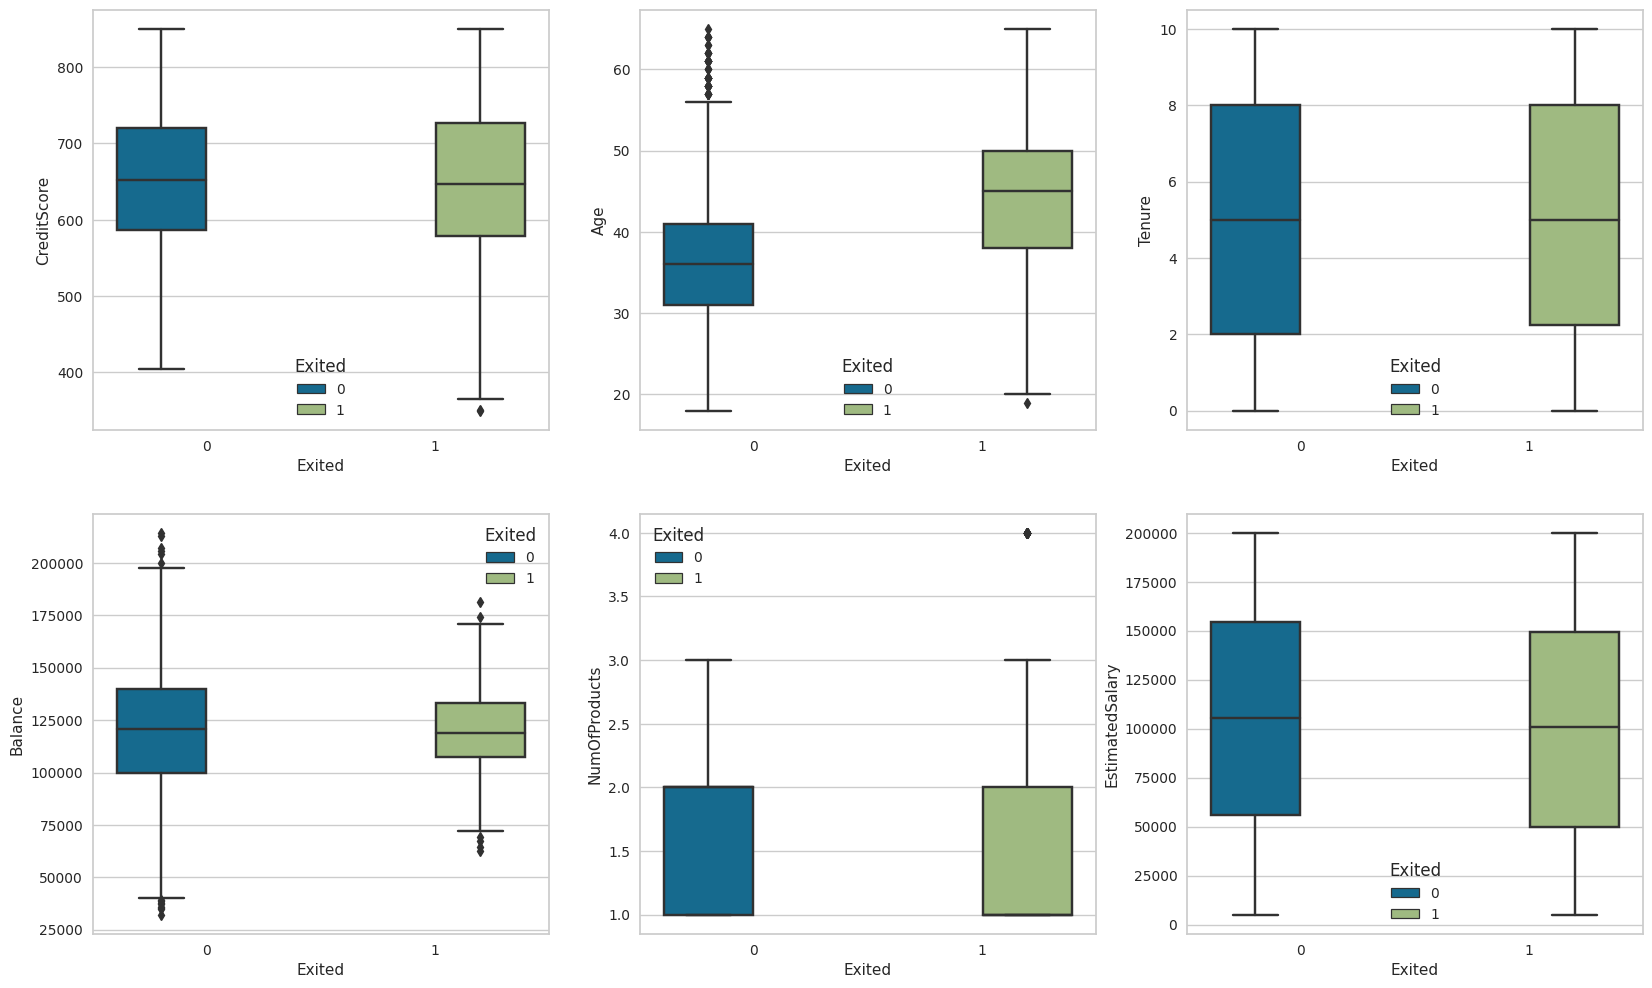

In [106]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
sns.boxplot(y='CreditScore', x = 'Exited',hue = 'Exited',data = df_germany_overview, ax=axarr[0][0])
sns.boxplot(y='Age', x = 'Exited',hue = 'Exited',data = df_germany_overview, ax=axarr[0][1])
# sns.boxplot(y='Gender', x = 'Exited',hue = 'Exited',data = df_germany_overview, ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[0][2])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[1][0])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[1][1])
# sns.boxplot(y='HasCrCard',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[1][1])
# sns.boxplot(y='IsActiveMember',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[1][2])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df_germany_overview, ax=axarr[1][2])

**Advanced Solution:**

* *In outline, using the central tendency approach, it seems that there are no significant differences that could create special characteristics to distinguish the "Churned" dataset and the "Retained" dataset for the German bank customer data set*
* *This is a strong reason for implementing cluster analysis to distribute dataset into clusters*
* *The goal is to divide the data set into clusters that can show "stronger" characteristics**

**Solusi Selanjutnya :**

* *Secara garis besar, dengan menggunakan pendekatan tendensi sentral, tampaknya tidak teridentifikasi perbedaan signifikan yang dapat menimbulkan karakteristik khusus untuk membedakan dataset "Churned" dan dataset "Retained" untuk dataset nasabah bank Jerman*
* *Hal ini menjadi alasan kuat untuk melakukan Cluster Analysis untuk mendistribusikan kumpulan data menjadi beberapa klaster*
* *Tujuannya adalah untuk dapat membagi kumpulan data menjadi beberapa cluster yang dapat menunjukkan karakteristik yang lebih "kuat"*

#### Correlation Between Attributes

In [107]:
df_corr = df_germany_overview[['CreditScore',	'Age','Gender',	'Tenure',	'Balance',	'NumOfProducts',	'HasCrCard',	'IsActiveMember',	'EstimatedSalary','Exited']]

/tmp/ipykernel_32/2462574975.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))


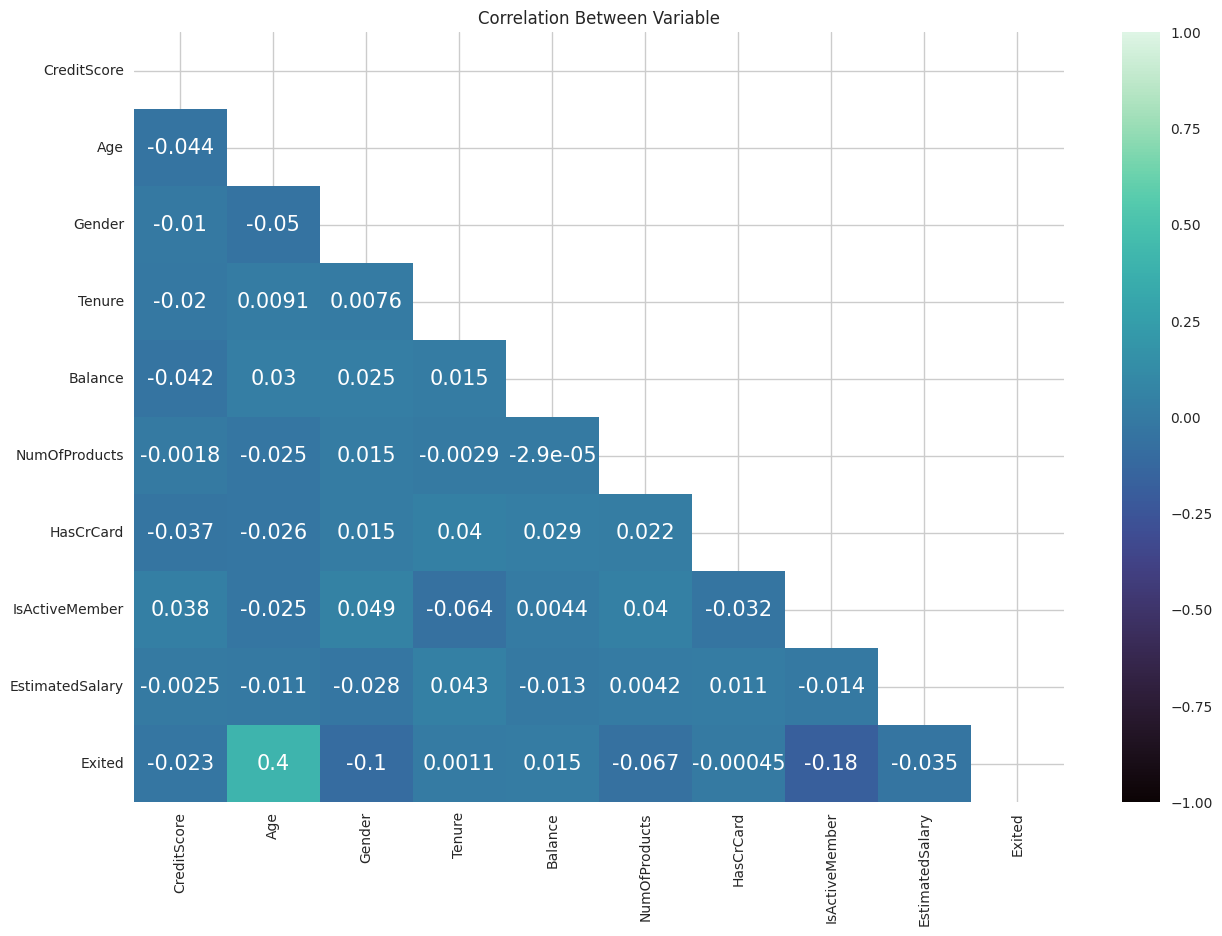

In [108]:
fig , ax = plt.subplots(figsize=(15,10))

ax.set_title('Correlation Between Variable')

mask = np.triu(np.ones_like(df_corr.corr(), dtype=np.bool))

sns.heatmap(df_corr.corr()
            ,vmin = -1
            ,vmax = 1
            ,cmap ='mako'
            ,annot = True
            ,mask = mask,
            annot_kws = {"fontsize":15})

plt.show()

From the heatmap diagram it can be seen that the Exited variable has the highest correlation with Age by 40%, followed by variable IsActiveMember of -18%. The percentage of correlation still weak.

# New Dataset : Transformation Dataset

In [109]:
df_transform = df_germany_overview[['CreditScore',	'Age',	'Gender',	'Tenure'
                                    ,	'Balance',	'NumOfProducts',	'HasCrCard'
                                    ,	'IsActiveMember',	'EstimatedSalary',	'Exited']]
df_transform

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,29,0,4,"115,046.74",4,1,0,"119,346.88",1
15,616,45,1,3,"143,129.41",2,0,1,"64,327.26",0
16,653,58,1,1,"132,602.88",1,1,0,"5,097.67",1
26,756,36,1,2,"136,815.64",1,1,1,"170,041.95",0
28,574,43,0,3,"141,349.43",1,1,1,"100,187.43",0
...,...,...,...,...,...,...,...,...,...,...
9982,655,46,0,7,"137,145.12",1,1,0,"115,146.4",1
9984,602,35,1,7,"90,602.42",2,1,1,"51,695.41",0
9986,673,47,1,1,"183,579.54",2,0,1,"34,047.54",0
9990,714,33,1,3,"35,016.6",1,1,0,"53,667.08",0


In [110]:
df_transform.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2382 entries, 7 to 9998
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      2382 non-null   int64  
 1   Age              2382 non-null   int64  
 2   Gender           2382 non-null   int64  
 3   Tenure           2382 non-null   int64  
 4   Balance          2382 non-null   float64
 5   NumOfProducts    2382 non-null   int64  
 6   HasCrCard        2382 non-null   int64  
 7   IsActiveMember   2382 non-null   int64  
 8   EstimatedSalary  2382 non-null   float64
 9   Exited           2382 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 204.7 KB


## Clustering For Dataset Segmentation

In [111]:
df_clust = df_transform.copy()
df_clust

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,29,0,4,"115,046.74",4,1,0,"119,346.88",1
15,616,45,1,3,"143,129.41",2,0,1,"64,327.26",0
16,653,58,1,1,"132,602.88",1,1,0,"5,097.67",1
26,756,36,1,2,"136,815.64",1,1,1,"170,041.95",0
28,574,43,0,3,"141,349.43",1,1,1,"100,187.43",0
...,...,...,...,...,...,...,...,...,...,...
9982,655,46,0,7,"137,145.12",1,1,0,"115,146.4",1
9984,602,35,1,7,"90,602.42",2,1,1,"51,695.41",0
9986,673,47,1,1,"183,579.54",2,0,1,"34,047.54",0
9990,714,33,1,3,"35,016.6",1,1,0,"53,667.08",0


### K-Means Clustering

In [112]:
df_kmeans = df_clust.copy()
df_kmeans

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
7,376,29,0,4,"115,046.74",4,1,0,"119,346.88",1
15,616,45,1,3,"143,129.41",2,0,1,"64,327.26",0
16,653,58,1,1,"132,602.88",1,1,0,"5,097.67",1
26,756,36,1,2,"136,815.64",1,1,1,"170,041.95",0
28,574,43,0,3,"141,349.43",1,1,1,"100,187.43",0
...,...,...,...,...,...,...,...,...,...,...
9982,655,46,0,7,"137,145.12",1,1,0,"115,146.4",1
9984,602,35,1,7,"90,602.42",2,1,1,"51,695.41",0
9986,673,47,1,1,"183,579.54",2,0,1,"34,047.54",0
9990,714,33,1,3,"35,016.6",1,1,0,"53,667.08",0


#### Data Scalling - KMeans

In [113]:
scaler = StandardScaler()
scaler.fit(df_kmeans)

df_kmeans_scaled = pd.DataFrame(scaler.transform(df_kmeans), columns = df_kmeans.columns)
print("All features are now scaled")

All features are now scaled


In [114]:
df_kmeans_scaled

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,-2.8069876448764695,-1.0714870416374185,-1.0508283792729964,-0.34080941617326826,-0.18183000006848116,3.9755912100625417,0.6314334185541186,-0.9808714143384072,0.2749056097356096,1.4358609466440986
1,-0.36007697796738325,0.649539346211759,0.9516301802696255,-0.6814758153863295,0.860958341151856,0.768730978986018,-1.5836982500701973,1.0195016241496802,-0.6961072918981462,-0.6964462696316137
2,0.01715508318110083,2.0478732863392155,0.9516301802696255,-1.362808613812452,0.47007874325371757,-0.8346991365522436,0.6314334185541186,-0.9808714143384072,-1.741419783123598,1.4358609466440986
3,1.0672875777295836,-0.3185379969534033,0.9516301802696255,-1.0221422145993908,0.6265103436805787,-0.8346991365522436,0.6314334185541186,1.0195016241496802,1.1695967584426776,-0.6964462696316137
4,-0.7882863446764733,0.43441104773061184,-1.0508283792729964,-0.6814758153863295,0.7948626888650404,-0.8346991365522436,0.6314334185541186,1.0195016241496802,-0.06322964343783787,-0.6964462696316137
...,...,...,...,...,...,...,...,...,...,...
2377,0.03754600540534321,0.7571034954523326,-1.0508283792729964,0.6811897814659155,0.638744860650128,-0.8346991365522436,0.6314334185541186,-0.9808714143384072,0.2007735042602434,1.4358609466440986
2378,-0.50281343353708,-0.4261021461939769,0.9516301802696255,0.6811897814659155,-1.0895161960412687,0.768730978986018,0.6314334185541186,1.0195016241496802,-0.919040298732842,-0.6964462696316137
2379,0.22106430542352468,0.8646676446929061,0.9516301802696255,-1.362808613812452,2.3629851770918506,0.768730978986018,-1.5836982500701973,1.0195016241496802,-1.2304984559566705,-0.6964462696316137
2380,0.6390782110204936,-0.641230444675124,0.9516301802696255,-0.6814758153863295,-3.1535736746632175,-0.8346991365522436,0.6314334185541186,-0.9808714143384072,-0.8842433116259839,-0.6964462696316137


#### Dimensionality Reduction - KMeans

In [115]:
pca = PCA(n_components = 2)
pca.fit(df_kmeans_scaled)

df_cluster_pca = pd.DataFrame(pca.fit_transform(df_kmeans_scaled), columns = (['PCA1', 'PCA2']))
df_cluster_pca

,PCA1,PCA2
0,0.5197006344574968,-1.7937780027092665
1,-0.642825991823571,1.217343612768249
2,2.4245961404986347,0.7506766560928264
3,-1.251394205639793,0.3426414341399855
4,-0.08718526969075927,0.07389377714846328
...,...,...
2377,2.140328942128629,-0.8152594425332813
2378,-1.3170433658429577,-0.3053074741502609
2379,-0.5148215044118902,1.584179578984188
2380,-0.8640174858153717,0.796405648690555


In [116]:
X = df_cluster_pca.iloc[:,:2].values
X

array([[ 0.51970063, -1.793778  ],
       [-0.64282599,  1.21734361],
       [ 2.42459614,  0.75067666],
       ...,
       [-0.5148215 ,  1.58417958],
       [-0.86401749,  0.79640565],
       [ 0.88815488,  0.64940186]])

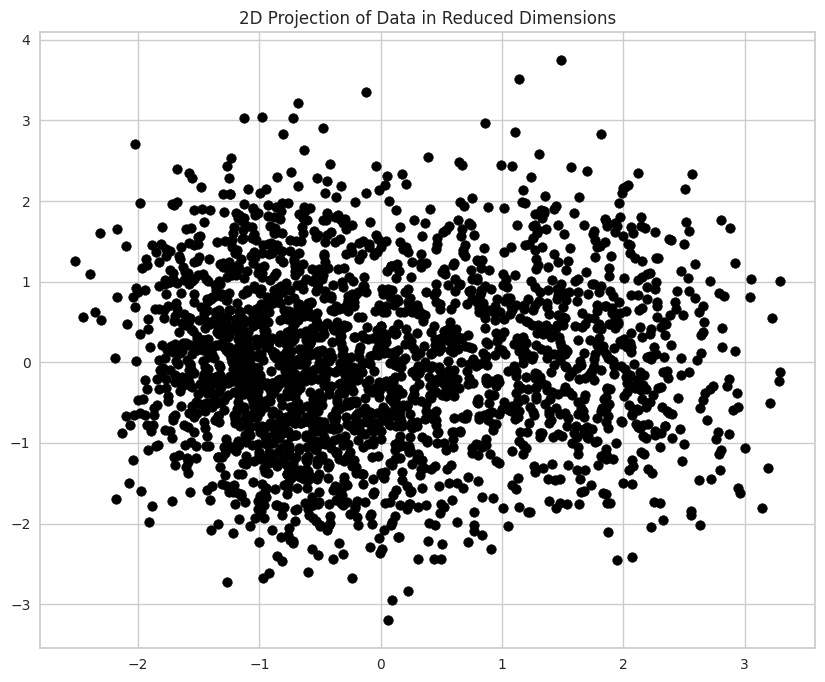

In [117]:
x = df_cluster_pca['PCA1']
y = df_cluster_pca['PCA2']

# Plotting
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="black", marker="o" )
ax.set_title("2D Projection of Data in Reduced Dimensions")
plt.show()

#### Clustering

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

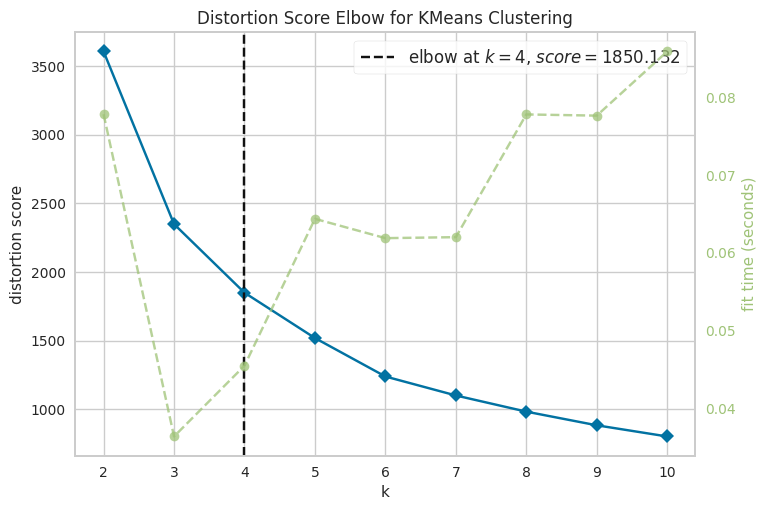

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [118]:
elbow = KElbowVisualizer(KMeans(), k=10)
elbow.fit(df_cluster_pca)
elbow.show()

In [119]:
# Initiating the K-Means Clustering model
kmeans = KMeans(n_clusters = 4)

# Fit model and predict clusters
kmeans = kmeans.fit_predict(df_cluster_pca)
df_cluster_pca["Cluster Label"] = kmeans
df_cluster_pca

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,PCA1,PCA2,Cluster Label
0,0.5197006344574968,-1.7937780027092665,3
1,-0.642825991823571,1.217343612768249,0
2,2.4245961404986347,0.7506766560928264,2
3,-1.251394205639793,0.3426414341399855,0
4,-0.08718526969075927,0.07389377714846328,3
...,...,...,...
2377,2.140328942128629,-0.8152594425332813,1
2378,-1.3170433658429577,-0.3053074741502609,3
2379,-0.5148215044118902,1.584179578984188,0
2380,-0.8640174858153717,0.796405648690555,0


#### Inserting "Cluster Labels" Into The Original Dataset

In [120]:
df_kmeans["Cluster Labels"] = kmeans
df_kmeans.head()

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster Labels
7,376,29,0,4,"115,046.74",4,1,0,"119,346.88",1,3
15,616,45,1,3,"143,129.41",2,0,1,"64,327.26",0,0
16,653,58,1,1,"132,602.88",1,1,0,"5,097.67",1,2
26,756,36,1,2,"136,815.64",1,1,1,"170,041.95",0,0
28,574,43,0,3,"141,349.43",1,1,1,"100,187.43",0,3


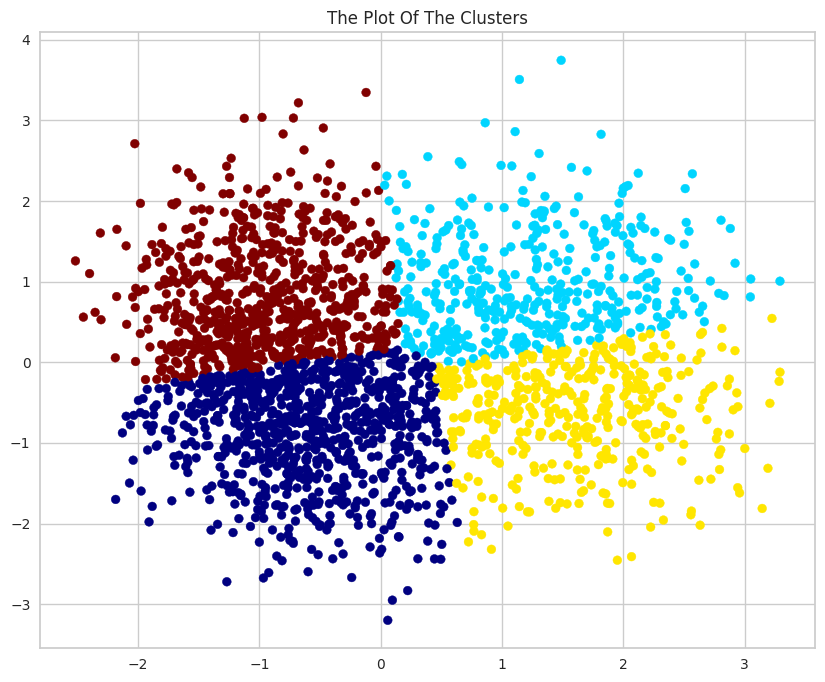

In [121]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y, s=40, c=df_kmeans["Cluster Labels"], marker='o', cmap='jet_r')
ax.set_title("The Plot Of The Clusters")
plt.show()

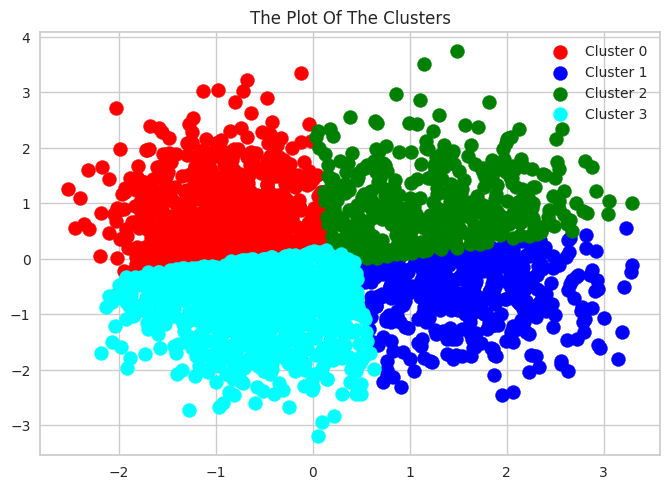

In [122]:
plt.scatter(X[kmeans == 0, 0], X[kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(X[kmeans == 1, 0], X[kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[kmeans == 2, 0], X[kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[kmeans == 3, 0], X[kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 3')
plt.title('The Plot Of The Clusters')
plt.legend()
plt.show()

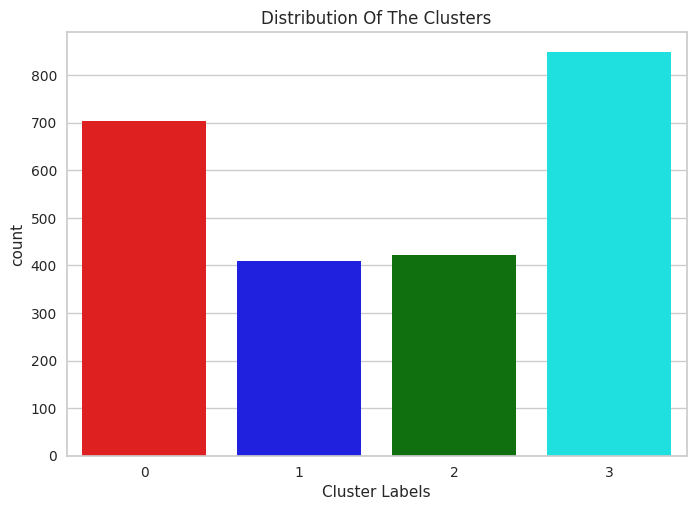

In [123]:
palette = ["red","blue", "green", "cyan"]
pl = sns.countplot(x=df_kmeans["Cluster Labels"], palette= palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

In [124]:
kmeans_clust_sizes = df_kmeans.groupby('Cluster Labels').size().to_frame()
kmeans_clust_sizes.columns = ["Kmeans Clustering Weight"]
kmeans_clust_sizes

,Kmeans Clustering Weight
Cluster Labels,
0,703
1,410
2,421
3,848


(array([703.,   0.,   0., 410.,   0.,   0., 421.,   0.,   0., 848.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

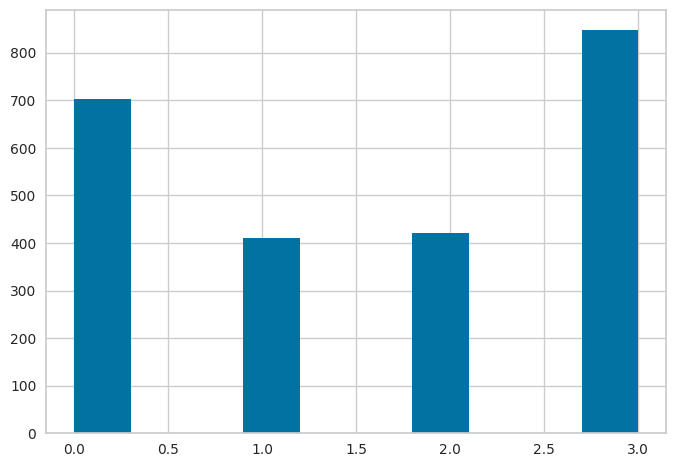

In [125]:
plt.hist(df_kmeans["Cluster Labels"])

In [126]:
df_kmeans.head()

,CreditScore,Age,Gender,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster Labels
7,376,29,0,4,"115,046.74",4,1,0,"119,346.88",1,3
15,616,45,1,3,"143,129.41",2,0,1,"64,327.26",0,0
16,653,58,1,1,"132,602.88",1,1,0,"5,097.67",1,2
26,756,36,1,2,"136,815.64",1,1,1,"170,041.95",0,0
28,574,43,0,3,"141,349.43",1,1,1,"100,187.43",0,3


#### Identify Attribute Characteristics Per Cluster

<Axes: xlabel='Cluster Labels', ylabel='NumOfProducts'>

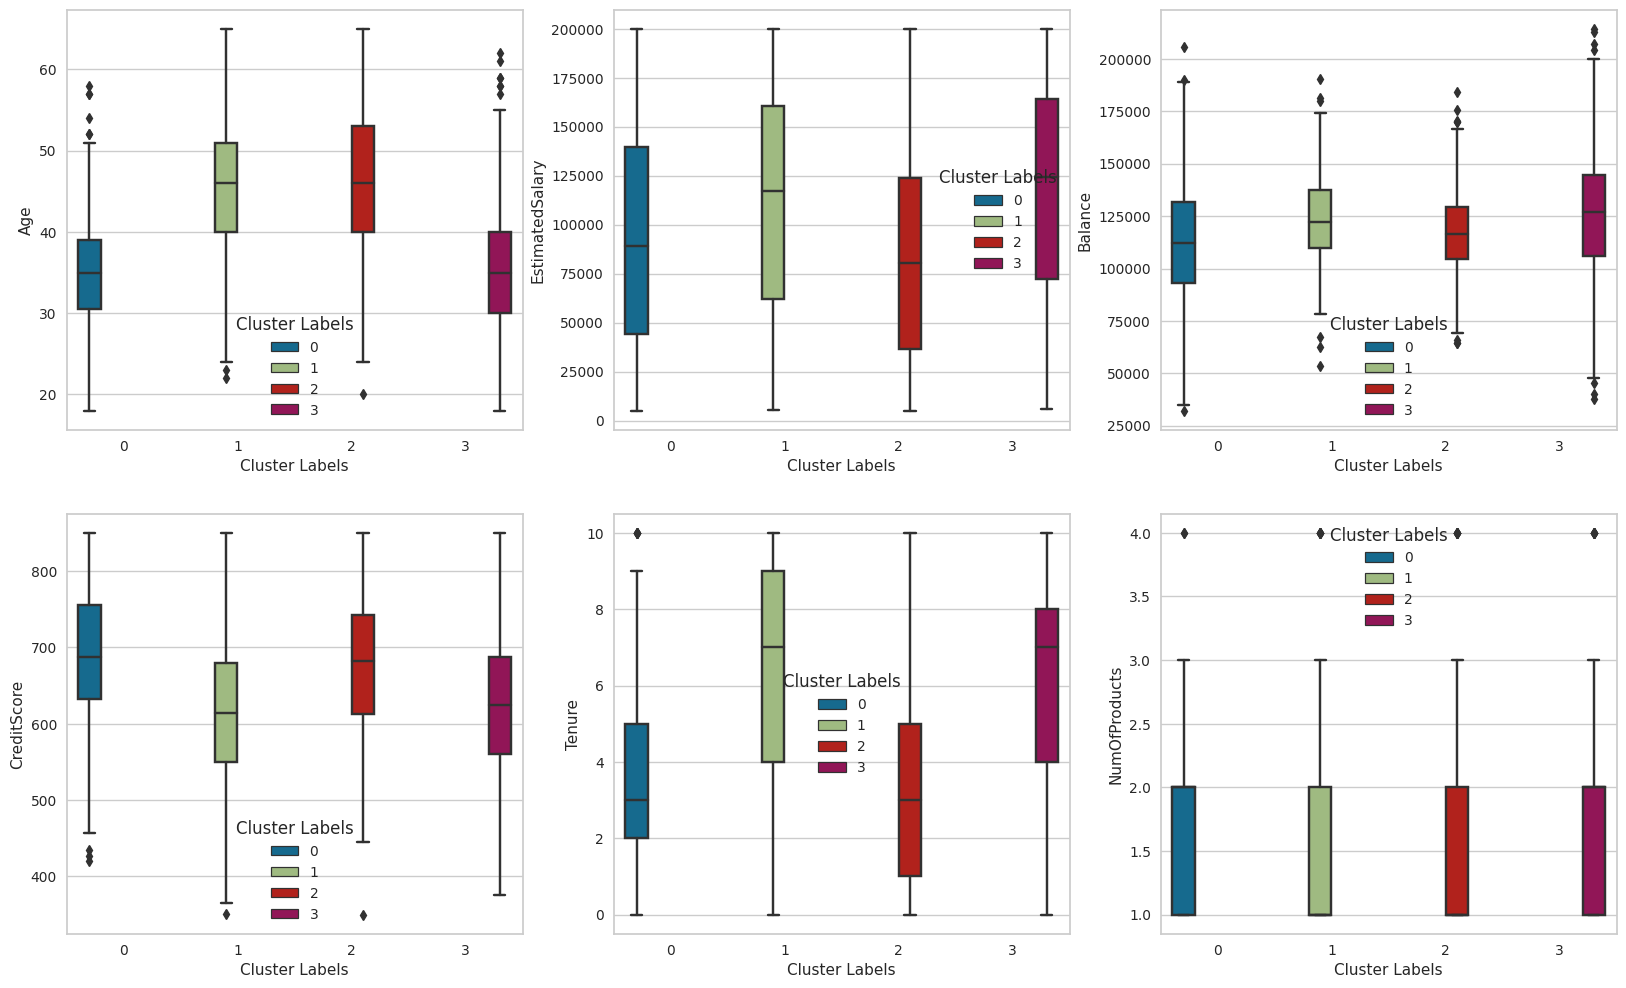

In [127]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
sns.boxplot(y='Age', x = 'Cluster Labels',hue = 'Cluster Labels',data = df_kmeans, ax=axarr[0][0])
sns.boxplot(y='EstimatedSalary',x = 'Cluster Labels', hue = 'Cluster Labels',data = df_kmeans, ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Cluster Labels', hue = 'Cluster Labels',data = df_kmeans, ax=axarr[0][2])
sns.boxplot(y='CreditScore', x = 'Cluster Labels',hue = 'Cluster Labels',data = df_kmeans, ax=axarr[1][0])
sns.boxplot(y='Tenure',x = 'Cluster Labels', hue = 'Cluster Labels',data = df_kmeans, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Cluster Labels', hue = 'Cluster Labels',data = df_kmeans, ax=axarr[1][2])


#EDA Cluster

ps: we already try to delete some variables like Creditscore, NumOfProducts and Balance (which correlations are weak to Exited), but no significant value to the new correlation, number of cluster, neither EDA cluster

In [128]:
df_eda = df_germany_clean.copy()
df_eda

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification
7,15656148,Germany,0,376,29,4,"115,046.74",4,1,0,"119,346.88",1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
15,15643966,Germany,1,616,45,3,"143,129.41",2,0,1,"64,327.26",0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000
16,15737452,Germany,1,653,58,1,"132,602.88",1,1,0,"5,097.67",1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000
26,15736816,Germany,1,756,36,2,"136,815.64",1,1,1,"170,041.95",0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000
28,15728693,Germany,0,574,43,3,"141,349.43",1,1,1,"100,187.43",0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,"137,145.12",1,1,0,"115,146.4",1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000
9984,15696175,Germany,1,602,35,7,"90,602.42",2,1,1,"51,695.41",0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000
9986,15581736,Germany,1,673,47,1,"183,579.54",2,0,1,"34,047.54",0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000
9990,15798964,Germany,1,714,33,3,"35,016.6",1,1,0,"53,667.08",0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000


Data Frame added the Cluster

In [129]:
df_eda["Cluster Label"] = kmeans
df_eda

,CustomerId,Geography,Gender,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditClassification,AgeClassification,TenureClassification,BalanceClassification,SalaryClassification,Cluster Label
7,15656148,Germany,0,376,29,4,"115,046.74",4,1,0,"119,346.88",1,Poor,Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000,3
15,15643966,Germany,1,616,45,3,"143,129.41",2,0,1,"64,327.26",0,Fair,Middle Age Adult,3 to 4 Years,100.000 to 150.000,50.000 to 100.000,0
16,15737452,Germany,1,653,58,1,"132,602.88",1,1,0,"5,097.67",1,Fair,Middle Age Adult,0 to 2 Years,100.000 to 150.000,Less than 50.000,2
26,15736816,Germany,1,756,36,2,"136,815.64",1,1,1,"170,041.95",0,Very Good,Adult,0 to 2 Years,100.000 to 150.000,150.000 to 200.000,0
28,15728693,Germany,0,574,43,3,"141,349.43",1,1,1,"100,187.43",0,Poor,Middle Age Adult,3 to 4 Years,100.000 to 150.000,100.000 to 150.000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,15768163,Germany,0,655,46,7,"137,145.12",1,1,0,"115,146.4",1,Fair,Middle Age Adult,7 to 8 Years,100.000 to 150.000,100.000 to 150.000,1
9984,15696175,Germany,1,602,35,7,"90,602.42",2,1,1,"51,695.41",0,Fair,Adult,7 to 8 Years,50.000 to 100.000,50.000 to 100.000,3
9986,15581736,Germany,1,673,47,1,"183,579.54",2,0,1,"34,047.54",0,Good,Middle Age Adult,0 to 2 Years,150.000 to 200.000,Less than 50.000,0
9990,15798964,Germany,1,714,33,3,"35,016.6",1,1,0,"53,667.08",0,Good,Adult,3 to 4 Years,Less than 50.000,50.000 to 100.000,0


<Axes: xlabel='Cluster Label', ylabel='NumOfProducts'>

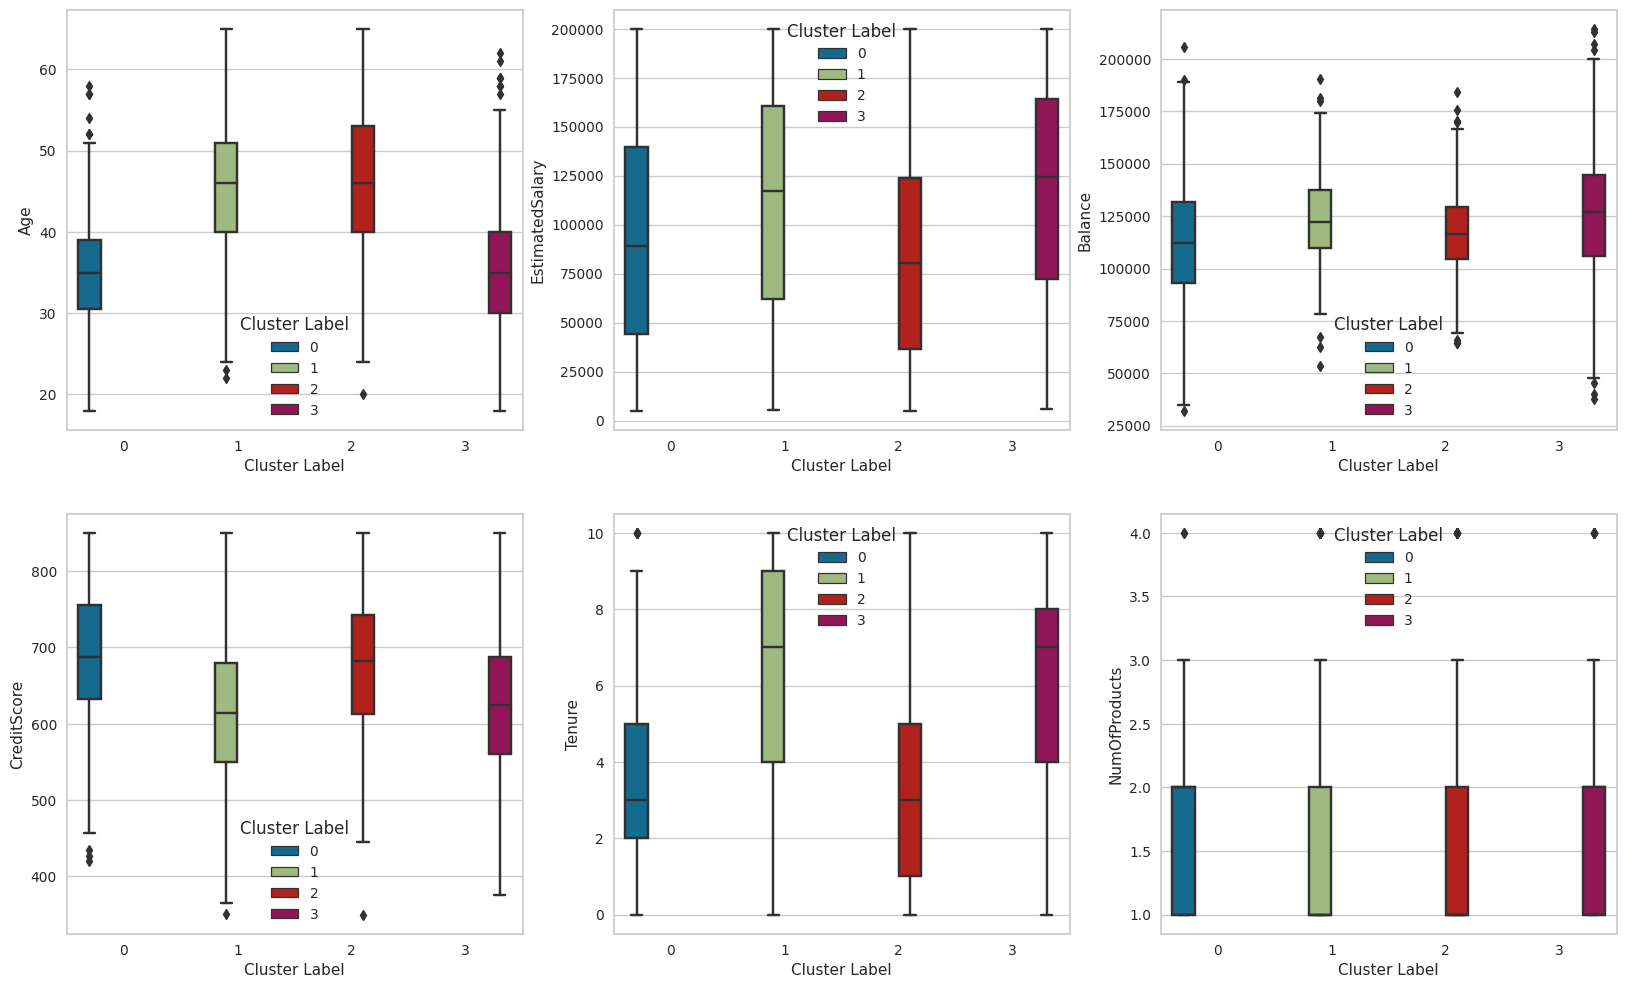

In [130]:
fig, axarr = plt.subplots(2, 3, figsize=(20, 12))
sns.boxplot(y='Age', x = 'Cluster Label',hue = 'Cluster Label',data = df_eda, ax=axarr[0][0])
sns.boxplot(y='EstimatedSalary',x = 'Cluster Label', hue = 'Cluster Label',data = df_eda, ax=axarr[0][1])
sns.boxplot(y='Balance',x = 'Cluster Label', hue = 'Cluster Label',data = df_eda, ax=axarr[0][2])
sns.boxplot(y='CreditScore', x = 'Cluster Label',hue = 'Cluster Label',data = df_eda, ax=axarr[1][0])
sns.boxplot(y='Tenure',x = 'Cluster Label', hue = 'Cluster Label',data = df_eda, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Cluster Label', hue = 'Cluster Label',data = df_eda, ax=axarr[1][2])


**EDA by aggregation**

ps: Creditscore, Gender and Balance have no distinct value so we don't take it to EDA Cluster

In [131]:
df_eda.groupby(['Cluster Label','AgeClassification']).agg({'CustomerId':'nunique'})

CustomerId
Cluster Label AgeClassification            
0             Adult                     528
              Middle Age Adult          168
              Teen                        7
1             Adult                      98
              Middle Age Adult          291
              Senior Adult               21
2             Adult                      92
              Middle Age Adult          293
              Senior Adult               36
3             Adult                     605
              Middle Age Adult          235
              Senior Adult                2
              Teen                        6

In [132]:
df_eda.groupby(['Cluster Label','SalaryClassification']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','TenureClassification']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','BalanceClassification']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','AgeClassification']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','CreditClassification']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','IsActiveMember']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','HasCrCard']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','Gender']).agg({'CustomerId':'nunique'})
# df_eda.groupby(['Cluster Label','NumOfProducts']).agg({'CustomerId':'nunique'})

# df_eda.groupby(['Cluster Label','Exited']).agg({'CustomerId':'nunique'})


CustomerId
Cluster Label SalaryClassification            
0             100.000 to 150.000           167
              150.000 to 200.000           146
              50.000 to 100.000            195
              Less than 50.000             195
1             100.000 to 150.000           113
              150.000 to 200.000           121
              50.000 to 100.000             99
              Less than 50.000              77
2             100.000 to 150.000            94
              150.000 to 200.000            70
              50.000 to 100.000            115
              Less than 50.000             142
3             100.000 to 150.000           249
              150.000 to 200.000           285
              50.000 to 100.000            191
              Less than 50.000             123

In [133]:
df_eda.groupby(['Cluster Label','TenureClassification']).agg({'CustomerId':'nunique'})

CustomerId
Cluster Label TenureClassification            
0             0 to 2 Years                 304
              3 to 4 Years                 178
              5 to 6 Years                 113
              7 to 8 Years                  67
              Above 8 Years                 41
1             0 to 2 Years                  46
              3 to 4 Years                  69
              5 to 6 Years                  83
              7 to 8 Years                 106
              Above 8 Years                106
2             0 to 2 Years                 171
              3 to 4 Years                 100
              5 to 6 Years                  79
              7 to 8 Years                  44
              Above 8 Years                 27
3             0 to 2 Years                  91
              3 to 4 Years                 129
              5 to 6 Years                 178
              7 to 8 Years                 248
              Above 8 Years                202

In [134]:
df_eda.groupby(['Cluster Label','CreditClassification']).agg({'CustomerId':'nunique'})

CustomerId
Cluster Label CreditClassification            
0             Excellent                     90
              Fair                         200
              Good                         201
              Poor                          76
              Very Good                    136
1             Excellent                     12
              Fair                         159
              Good                          64
              Poor                         141
              Very Good                     34
2             Excellent                     40
              Fair                         122
              Good                         114
              Poor                          72
              Very Good                     73
3             Excellent                     24
              Fair                         334
              Good                         161
              Poor                         260
              Very Good                     69

In [135]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [136]:
df_eda.groupby(['Cluster Label','NumOfProducts']).agg({'CustomerId':'nunique'})

CustomerId
Cluster Label NumOfProducts            
0             1                     318
              2                     375
              3                       8
              4                       2
1             1                     293
              2                      68
              3                      42
              4                       7
2             1                     304
              2                      80
              3                      29
              4                       8
3             1                     369
              2                     457
              3                      15
              4                       7

In [137]:
df_eda.groupby(['Cluster Label']).describe()

CustomerId                                                       \
                   count                 mean                std          min   
Cluster Label                                                                   
0                  703.0 15,695,862.453769559  74,193.2065025785 15,566,156.0   
1                  410.0 15,684,552.787804877 71,724.15488527005 15,566,253.0   
2                  421.0 15,694,290.334916865 76,191.51994486651 15,566,030.0   
3                  848.0 15,688,267.320754716 71,104.77254172918 15,565,779.0   

                                                                    Gender  \
                        25%          50%           75%          max  count   
Cluster Label                                                                
0              15,630,869.5 15,697,000.0  15,763,637.0 15,814,772.0  703.0   
1             15,625,822.75 15,677,220.5 15,750,213.25 15,815,656.0  410.0   
2              15,627,220.0 15,700,540.0  15,759,387.0 15,815,490.0  421.0   
3             15,627,179.25 15,689,789.0 15,748,994.25 15,814,664.0  848.0   

                                                                           \
                             mean                 std min 25% 50% 75% max   
Cluster Label                                                               
0              0.5689900426742532 0.49557009521754825 0.0 0.0 1.0 1.0 1.0   
1             0.44634146341463415  0.4977197692399105 0.0 0.0 0.0 1.0 1.0   
2              0.3752969121140142 0.48477556880425593 0.0 0.0 0.0 1.0 1.0   
3              0.6002358490566038  0.4901388291274265 0.0 0.0 1.0 1.0 1.0   

              CreditScore                                                   \
                    count              mean               std   min    25%   
Cluster Label                                                                
0                   703.0 691.9871977240398 88.26915007980578 420.0  632.0   
1                   410.0  615.770731707317 96.22961091357593 351.0  550.0   
2                   421.0 676.2636579572446 94.49902662596136 350.0  613.0   
3                   848.0 622.4033018867924 92.55664254289437 376.0 560.25   

                                   Age                                        \
                50%    75%   max count               mean                std   
Cluster Label                                                                  
0             688.0  755.5 850.0 703.0  34.93172119487909 6.5442524550678245   
1             614.0 679.75 850.0 410.0 45.948780487804875  8.399546557537168   
2             682.0  743.0 850.0 421.0  46.53681710213777  8.992944236206313   
3             624.0 687.25 850.0 848.0   35.1627358490566  7.301852593831425   

                                       Tenure                     \
               min  25%  50%  75%  max  count               mean   
Cluster Label                                                      
0             18.0 30.5 35.0 39.0 58.0  703.0 3.5533428165007113   
1             22.0 40.0 46.0 51.0 65.0  410.0  6.219512195121951   
2             20.0 40.0 46.0 53.0 65.0  421.0  3.655581947743468   
3             18.0 30.0 35.0 40.0 62.0  848.0  6.278301886792453   

                                                     Balance  \
                            std min 25% 50% 75%  max   count   
Cluster Label                                                  
0              2.53458966946641 0.0 2.0 3.0 5.0 10.0   703.0   
1             2.682116770894129 0.0 4.0 7.0 9.0 10.0   410.0   
2              2.70231795669975 0.0 1.0 3.0 5.0 10.0   421.0   
3             2.611915470660567 0.0 4.0 7.0 8.0 10.0   848.0   

                                                                              \
                             mean                 std       min          25%   
Cluster Label                                                                  
0             112,123.90692745378   29,290.0107376565 32,197.64    92,888.52   
1    

1 (ETB potential priority) : Adult, higher salary, old customer, has credit card, have 1-2 products, inactive (not significant) --> retain

2 (NTB Modest Elders) : Middle Age Adult, smaller salary, new customer, only has 1 product, active (not significant), proportional possession of Credit card --> Exit

3 (ETB loyal Executive): Middle Age Adult, higher salary, old customer, has credit card, inactive, only has 1 product --> Exit

4 (NTB Rookie career / career starter) : Adult, smaller salary, new customer, have 1-2 products, active, proportional possession of Credit card --> retain


Recommendation:

Customer churn focus (cluster 2 & 3)
1. Cluster 2 (NTB Modest Elders)
- active middle age customer --> simplify administration process for making services, lower admin fee below other competitors, reward point for every transaction which can be redeemed to shop groceries or daily necesities. Proposition pension saving with higher interest and bundling with specific insurance for new elderly customer.

2. Cluster 3 (ETB Loyal Executive)
- inactive -> increasing the quality of Bank service, e.g. bank service more accesible through various channel anytime and anywhere, streamline service process to produce shorter TAT, improve UI for mobile Banking,  hence customer will use Bank service more.
- as part of KYC, engage with customer to know if customer's business or company need lending for working capital. if yes, refer customer to wholesale banking service to provide customers with needed fund.


Focus to keep retained customer (cluster 1&4)
1. cluster 1 (ETB Potential Priority)
- mostly have credit card --> upgrade credit card tier with no Credit Card annual fee, give out loyalty points aligned to transaction frequency/amount.  
- young customer with high salary --> Offer tailored wealth management plan according to RPQ, offer multi-purpose products such as investation scheme that also covers health insurance benefit, Offer Housing Loan with competitive rate.

2. cluster 4 (NTB Career Starter)
- develop partnership with fintech frequently used by younger customers. e.g top up vis mobile bsnking app without any transfer fee.
- investation scheme that enable customer to invest with minimum ammount, e.g. minimum spend 10 euro. (bayar 10 euro udah bisa beli product reksadana)
- active + younger customers yang masih ga terlalu gede salarynya pasti suka event gratisan --> make occasional event such as free workout class, mini concert, personal and/or wealth development class/webinar targeting younger new customer with active transactions.


Abbreviations
NTB = New-to-Bank --> sebutan untuk nasabah baru
ETB = Existing-to-Bank --> sebutan untuk nasabah yang sudah ada di Bank
TAT = turn around time --> the time within which the specified activity or step or process is agreed to be completed.
KYC = Know YOur Customer --> prinsip mengenal nasabah


Characteristic Explained

Germans in General:
- famous for being thrifty, already have a habit of saving in general (https://qz.com/1241591/why-the-germans-are-obsessed-with-saving-money/)
- financial cautious, credit card lebih seperti pinjaman yang digunakan untuk membuktikan financial stability. pendekatan umumnnya adalah mereka hanya membelanjakan apa yang mereka bisa afford.( https://learngerman.dw.com/en/7-german-habits-you-should-consider-adopting/a-50249770)
- Germans place a high priority on structure, privacy and punctuality. The German people embrace the values of thriftiness, hard work and industriousness (https://www.livescience.com/44007-german-culture.html)
-  those aged 25 to 34, 85% rent their homes (for ages 35 to 44, 71% rent), and of those age 75 and older, slightly more than half are renters. Homeownership rates peak in the remaining age groups. Because the high transaction costs associated with buying homes are a burden, especially for younger people (who also more often face labor mobility requirements), young households tend to remain renters for longer.
- Rentership is also strongly associated with having no school completion or vocational qualification.Homeownership is strongly correlated with net wealth and income.(https://www.brookings.edu/essay/germany-rental-housing-markets/)
- Germany is the most populous European country west of Russia. Its population density is high in comparison with most other European countries

## Link To PPT

Presentasi: <https://drive.google.com/file/d/1ktJ4_acY0G_EnOx-HdgbCWP0kjFkNOeQ/view?usp=sharing>

In [ ]:
# df_eda.to_excel('dataset_gfp.xlsx')